In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})

In [3]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
plt.rcParams.update({'font.size': 18})

# QUESTION1. Read the data as an appropriate Time Series data and plot the data.
#### 2

In [4]:
df=pd.read_csv('SoftDrink (1) (2).csv',parse_dates=True,index_col='YearMonth')
print('\n')
print('First 5 observations of the Data set on SoftDrinkProduction')
display(df.head(5))
print('\n')
print('Last 5 observations of the Data set on SoftDrinkProduction','\n')
display(df.tail(5))



First 5 observations of the Data set on SoftDrinkProduction


SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226



Last 5 observations of the Data set on SoftDrinkProduction 



SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

In [5]:
df.isnull().sum()

SoftDrinkProduction    0
dtype: int64

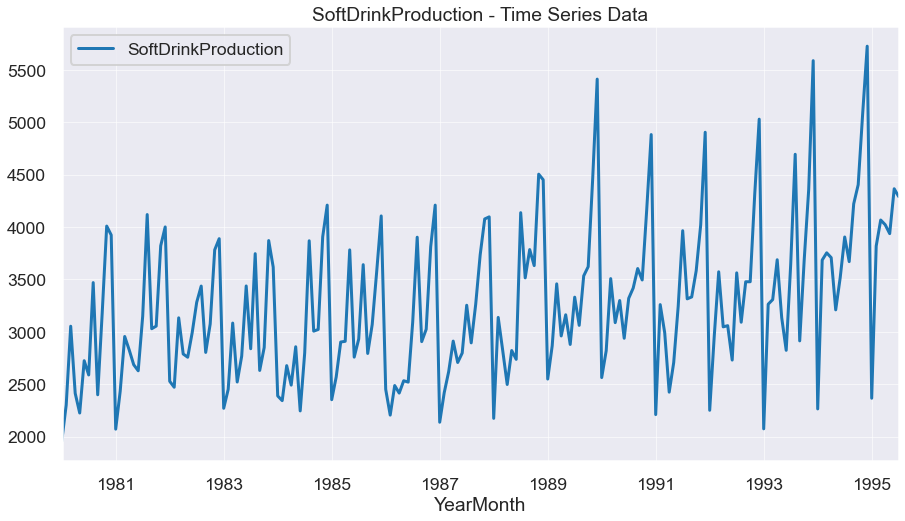

In [6]:
df.plot(grid=True);
plt.title('SoftDrinkProduction - Time Series Data');

In [7]:
df.describe()

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

# QUESTION2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
#### 5

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


None

In [9]:
display(df.dtypes)

SoftDrinkProduction    int64
dtype: object

In [10]:
display(df.isnull().sum())

SoftDrinkProduction    0
dtype: int64

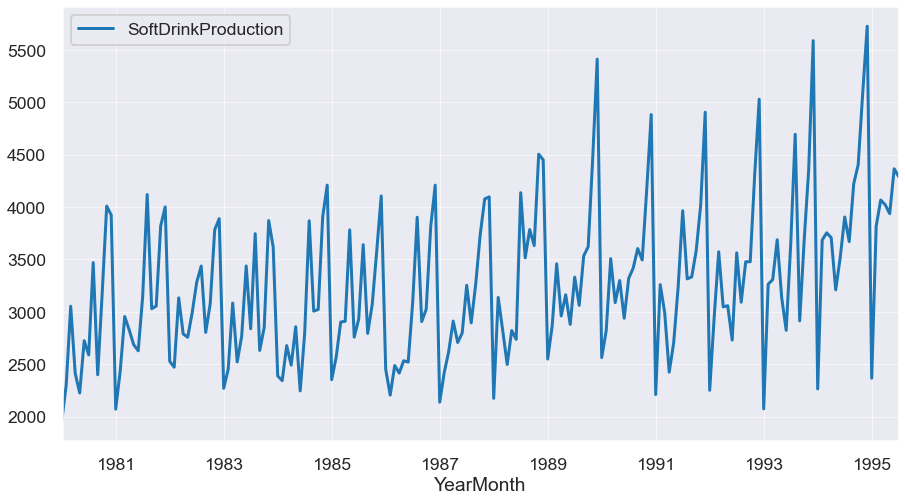

In [11]:
df.plot(grid=True);

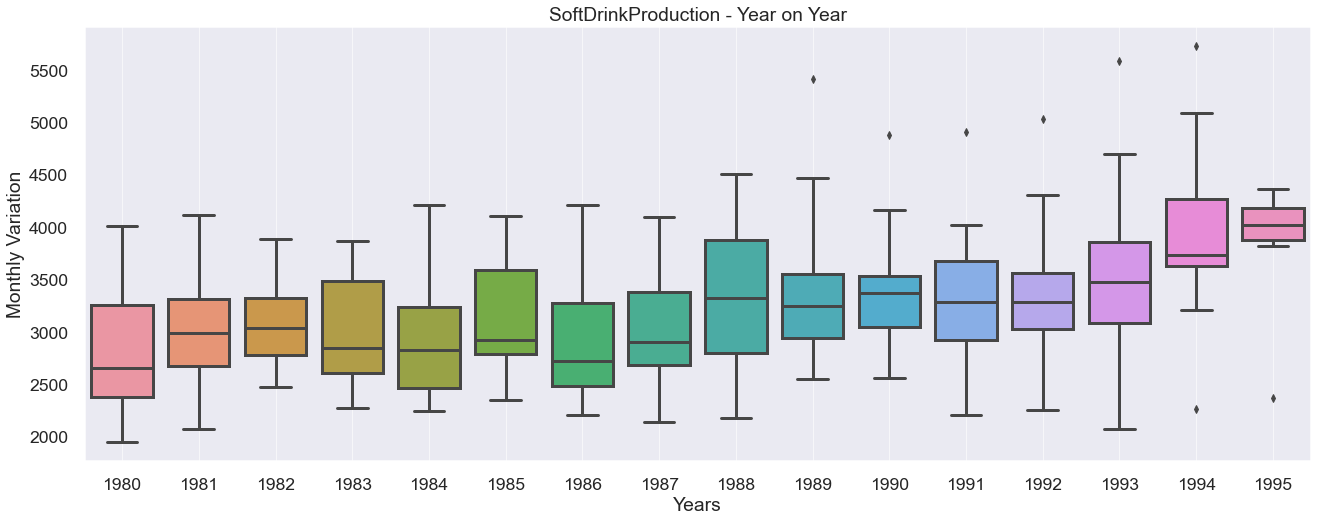

In [12]:
#### Plot Box plot for year on year Wine Sales
df_series=pd.read_csv('SoftDrink (1) (2).csv',parse_dates=True,index_col='YearMonth',squeeze=True)
fig , ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_series.index.year,df_series,ax=ax); 
plt.grid();
plt.title('SoftDrinkProduction - Year on Year')
plt.xlabel('Years');
plt.ylabel('Monthly Variation');


### Monthly Production for all the years

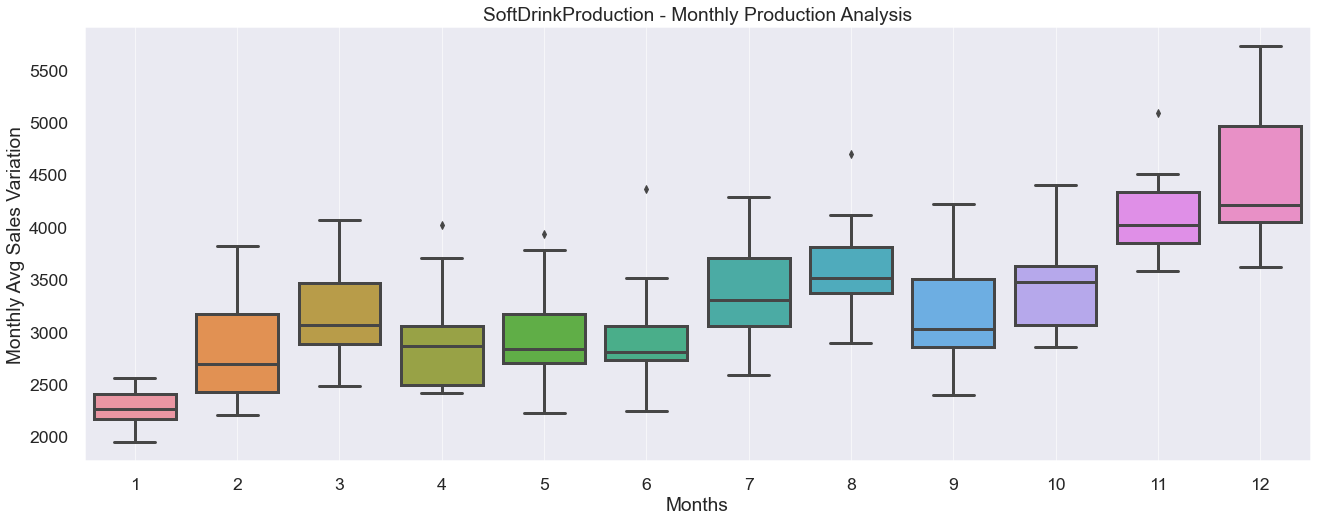

In [13]:
fig , ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_series.index.month,df_series,ax=ax); # rose_series is a series and not a dataframe
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Avg Sales Variation');
plt.title('SoftDrinkProduction - Monthly Production Analysis');



### Month Plot for Soft Drink Production

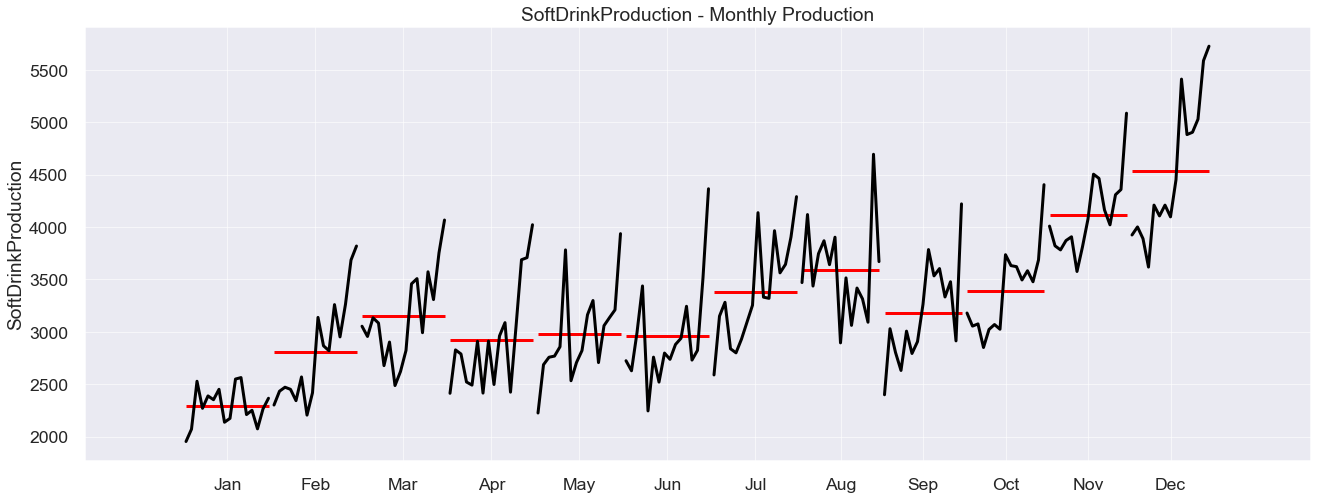

In [14]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax= plt.subplots(figsize=(22,8))
month_plot(df_series,ylabel='SoftDrinkProduction',ax=ax);

plt.title("SoftDrinkProduction - Monthly Production");

### Monthly Production Year wise

In [15]:
df_yearly_sales_across_months=pd.pivot_table(data=df,
                                          index=df.index.year,
                                          columns=df.index.month,
                                          values='SoftDrinkProduction',
                                              aggfunc='mean')
print('\n')
print('SoftDrinkProduction - Year on Year monthly Production','\n')
display(round(df_yearly_sales_across_months,0))



SoftDrinkProduction - Year on Year monthly Production 



YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1954.0  2302.0  3054.0  2414.0  2226.0  2725.0  2589.0  3470.0   
1981       2072.0  2434.0  2956.0  2828.0  2687.0  2629.0  3150.0  4119.0   
1982       2529.0  2472.0  3134.0  2789.0  2758.0  2993.0  3282.0  3437.0   
1983       2271.0  2452.0  3084.0  2522.0  2769.0  3438.0  2839.0  3746.0   
1984       2389.0  2344.0  2678.0  2492.0  2858.0  2246.0  2800.0  3869.0   
1985       2353.0  2570.0  2903.0  2910.0  3782.0  2759.0  2931.0  3641.0   
1986       2452.0  2206.0  2488.0  2416.0  2534.0  2521.0  3093.0  3903.0   
1987       2138.0  2419.0  2622.0  2912.0  2708.0  2798.0  3254.0  2895.0   
1988       2175.0  3138.0  2823.0  2498.0  2822.0  2738.0  4137.0  3515.0   
1989       2550.0  2867.0  3458.0  2961.0  3163.0  2880.0  3331.0  3062.0   
1990       2564.0  2820.0  3508.0  3088.0  3299.0  2939.0  3320.0  3418.0   
1991       2211.0  3260.0  2992.0  2425.0  2707.0  3244.0  3965.0  3315.0   
1992       2252.0  2952.0  3573.0  3048.0  3059.0  2731.0  3563.0  3092.0   
1993       2075.0  3264.0  3308.0  3688.0  3136.0  2824.0  3644.0  4694.0   
1994       2265.0  3685.0  3754.0  3708.0  3210.0  3517.0  3905.0  3670.0   
1995       2367.0  3819.0  4067.0  4022.0  3937.0  4365.0  4290.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       2400.0  3180.0  4009.0  3924.0  
1981       3030.0  3055.0  3821.0  4001.0  
1982       2804.0  3076.0  3782.0  3889.0  
1983       2632.0  2851.0  3871.0  3618.0  
1984       3007.0  3023.0  3907.0  4209.0  
1985       2794.0  3070.0  3576.0  4106.0  
1986       2907.0  3025.0  3812.0  4209.0  
1987       3263.0  3736.0  4077.0  4097.0  
1988       3785.0  3632.0  4504.0  4451.0  
1989       3534.0  3622.0  4464.0  5411.0  
1990       3604.0  3495.0  4163.0  4882.0  
1991       3333.0  3583.0  4021.0  4904.0  
1992       3478.0  3478.0  4308.0  5029.0  
1993       2914.0  3686.0  4358.0  5587.0  
1994       4221.0  4404.0  5086.0  5725.0  
1995          NaN     NaN     NaN     NaN

In [125]:
df_yearly_production_across_months=pd.pivot_table(data=df,
#                                          index=df.index.year,
                                          columns=df.index.month,
                                          values='SoftDrinkProduction',
                                              aggfunc='mean')
print('\n')
print('SoftDrinkProduction - Average monthly Production','\n')
display(round(df_yearly_production_across_months,0))



SoftDrinkProduction - Average monthly Production 



YearMonth                1       2       3       4       5       6       7   \
SoftDrinkProduction  2289.0  2813.0  3150.0  2920.0  2978.0  2959.0  3381.0   

YearMonth                8       9       10      11      12  
SoftDrinkProduction  3590.0  3180.0  3394.0  4117.0  4536.0

In [17]:
df_yearly_production_across_months=pd.pivot_table(data=df,
                                          index=df.index.year,
                                          columns=df.index.month,
                                          values='SoftDrinkProduction',
                                          aggfunc='mean')
                                                
                                                   
print('\n')
print('SoftDrinkProduction - Year on Year monthly sales','\n')
display(round(df_yearly_production_across_months,0))



SoftDrinkProduction - Year on Year monthly sales 



YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1954.0  2302.0  3054.0  2414.0  2226.0  2725.0  2589.0  3470.0   
1981       2072.0  2434.0  2956.0  2828.0  2687.0  2629.0  3150.0  4119.0   
1982       2529.0  2472.0  3134.0  2789.0  2758.0  2993.0  3282.0  3437.0   
1983       2271.0  2452.0  3084.0  2522.0  2769.0  3438.0  2839.0  3746.0   
1984       2389.0  2344.0  2678.0  2492.0  2858.0  2246.0  2800.0  3869.0   
1985       2353.0  2570.0  2903.0  2910.0  3782.0  2759.0  2931.0  3641.0   
1986       2452.0  2206.0  2488.0  2416.0  2534.0  2521.0  3093.0  3903.0   
1987       2138.0  2419.0  2622.0  2912.0  2708.0  2798.0  3254.0  2895.0   
1988       2175.0  3138.0  2823.0  2498.0  2822.0  2738.0  4137.0  3515.0   
1989       2550.0  2867.0  3458.0  2961.0  3163.0  2880.0  3331.0  3062.0   
1990       2564.0  2820.0  3508.0  3088.0  3299.0  2939.0  3320.0  3418.0   
1991       2211.0  3260.0  2992.0  2425.0  2707.0  3244.0  3965.0  3315.0   
1992       2252.0  2952.0  3573.0  3048.0  3059.0  2731.0  3563.0  3092.0   
1993       2075.0  3264.0  3308.0  3688.0  3136.0  2824.0  3644.0  4694.0   
1994       2265.0  3685.0  3754.0  3708.0  3210.0  3517.0  3905.0  3670.0   
1995       2367.0  3819.0  4067.0  4022.0  3937.0  4365.0  4290.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       2400.0  3180.0  4009.0  3924.0  
1981       3030.0  3055.0  3821.0  4001.0  
1982       2804.0  3076.0  3782.0  3889.0  
1983       2632.0  2851.0  3871.0  3618.0  
1984       3007.0  3023.0  3907.0  4209.0  
1985       2794.0  3070.0  3576.0  4106.0  
1986       2907.0  3025.0  3812.0  4209.0  
1987       3263.0  3736.0  4077.0  4097.0  
1988       3785.0  3632.0  4504.0  4451.0  
1989       3534.0  3622.0  4464.0  5411.0  
1990       3604.0  3495.0  4163.0  4882.0  
1991       3333.0  3583.0  4021.0  4904.0  
1992       3478.0  3478.0  4308.0  5029.0  
1993       2914.0  3686.0  4358.0  5587.0  
1994       4221.0  4404.0  5086.0  5725.0  
1995          NaN     NaN     NaN     NaN

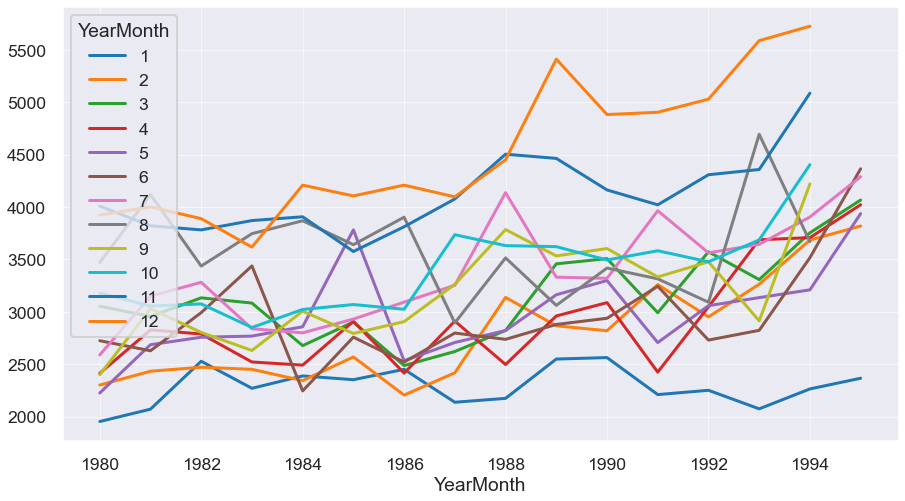

In [18]:
df_yearly_production_across_months.plot();

### Read the data year wise - sum of all monthly sales

SoftDrinkProduction
YearMonth                      
1980-12-31                34247
1981-12-31                36782
1982-12-31                36945
1983-12-31                36093
1984-12-31                35822
1985-12-31                37395
1986-12-31                35566
1987-12-31                36919
1988-12-31                40218
1989-12-31                41303
1990-12-31                41100
1991-12-31                39960
1992-12-31                40563
1993-12-31                43178
1994-12-31                47150
1995-12-31                26867

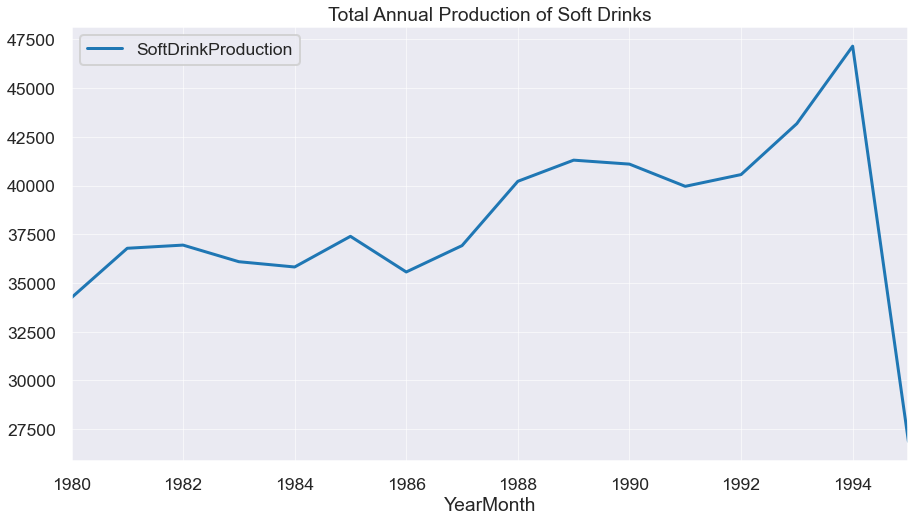

In [131]:
df_yearly_sum=df.resample('A').sum()
display(df_yearly_sum)
df_yearly_sum.plot();
plt.title('Total Annual Production of Soft Drinks');

### Read the data year wise - mean of all Yearly sales

SoftDrinkProduction
YearMonth                      
1980-12-31               2854.0
1981-12-31               3065.0
1982-12-31               3079.0
1983-12-31               3008.0
1984-12-31               2985.0
1985-12-31               3116.0
1986-12-31               2964.0
1987-12-31               3077.0
1988-12-31               3352.0
1989-12-31               3442.0
1990-12-31               3425.0
1991-12-31               3330.0
1992-12-31               3380.0
1993-12-31               3598.0
1994-12-31               3929.0
1995-12-31               3838.0

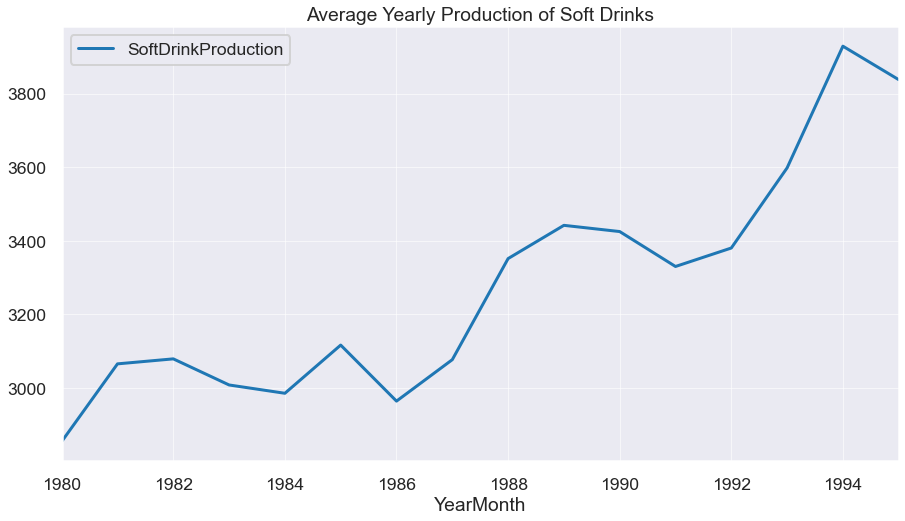

In [137]:
df_yearly_sum=df.resample('A').mean()
display(round(df_yearly_sum,0))
df_yearly_sum.plot();
plt.title('Average Yearly Production of Soft Drinks');

<AxesSubplot:xlabel='YearMonth'>

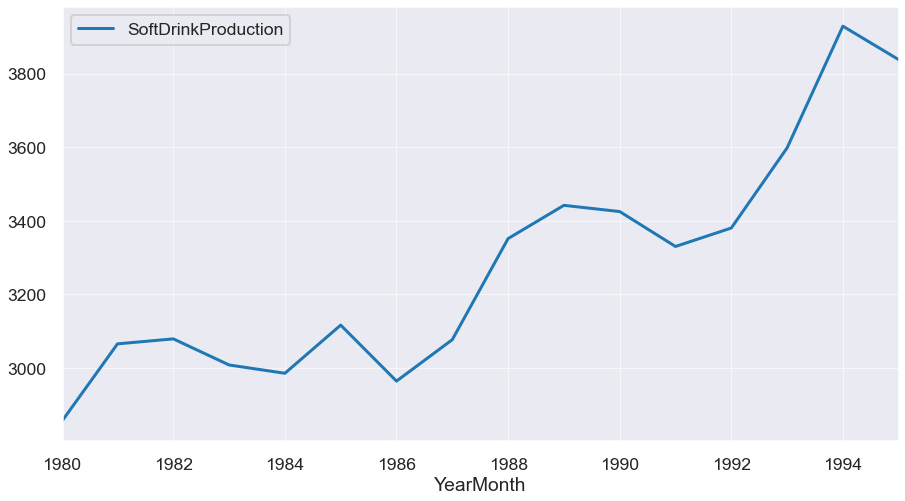

In [21]:
df_yearly_sum.plot()

In [133]:
df_yearly_sum=df.resample('A').sum().T
df_yearly_sum

YearMonth            1980-12-31  1981-12-31  1982-12-31  1983-12-31  \
SoftDrinkProduction       34247       36782       36945       36093   

YearMonth            1984-12-31  1985-12-31  1986-12-31  1987-12-31  \
SoftDrinkProduction       35822       37395       35566       36919   

YearMonth            1988-12-31  1989-12-31  1990-12-31  1991-12-31  \
SoftDrinkProduction       40218       41303       41100       39960   

YearMonth            1992-12-31  1993-12-31  1994-12-31  1995-12-31  
SoftDrinkProduction       40563       43178       47150       26867

In [136]:
df_yearly_sum.T

YearMonth             1980-12-31   1981-12-31  1982-12-31  1983-12-31  \
SoftDrinkProduction  2853.916667  3065.166667     3078.75     3007.75   

YearMonth             1984-12-31  1985-12-31   1986-12-31   1987-12-31  \
SoftDrinkProduction  2985.166667     3116.25  2963.833333  3076.583333   

YearMonth            1988-12-31   1989-12-31  1990-12-31  1991-12-31  \
SoftDrinkProduction      3351.5  3441.916667      3425.0      3330.0   

YearMonth            1992-12-31   1993-12-31   1994-12-31   1995-12-31  
SoftDrinkProduction     3380.25  3598.166667  3929.166667  3838.142857

### Decompose the data

### ADDITIVE MODEL

'Soft Drinks -Decomposition of Production Data - Additive Model'

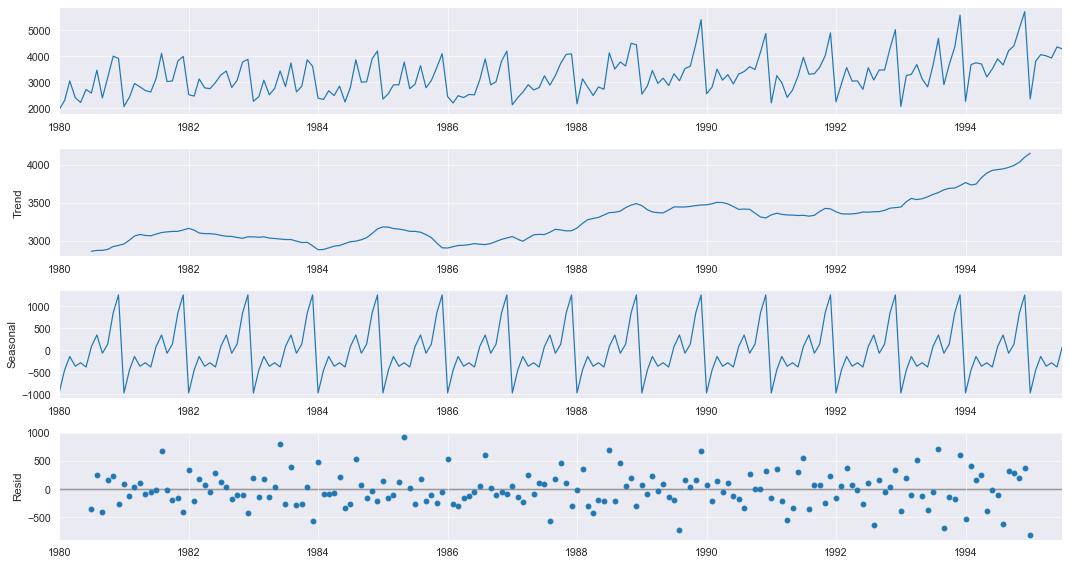

In [22]:
sns.set_context("paper", font_scale = 1.2, rc={"grid.linewidth": 0.6})
df_additive_decomposition=seasonal_decompose(df,model='additive')
df_additive_decomposition.plot();
display('Soft Drinks -Decomposition of Production Data - Additive Model')

#### MULTIPLICATIVE Model

'Soft Drink -Decomposition of Production Data - Multiplicative Model'

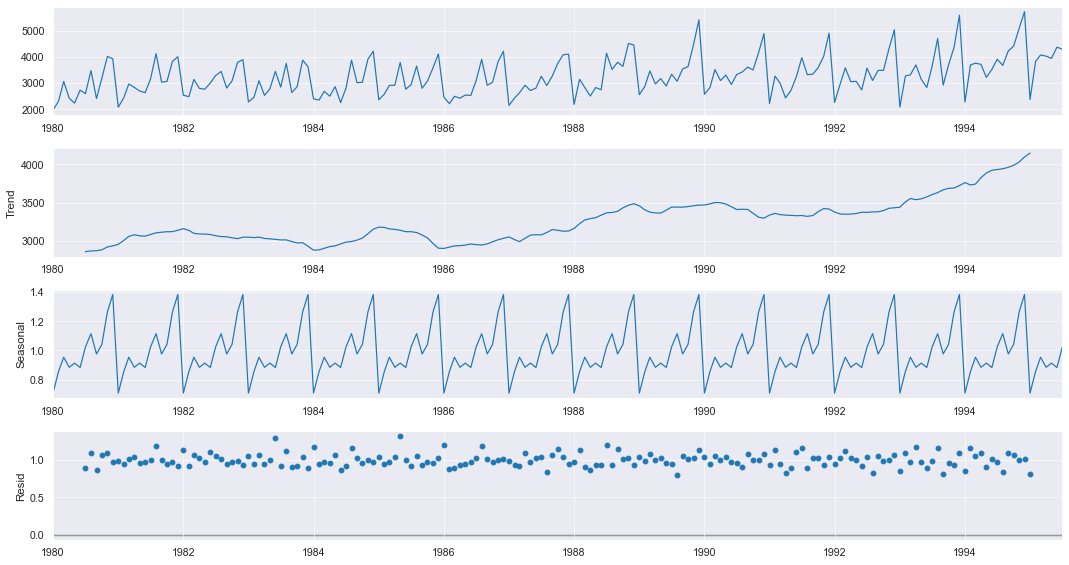

In [23]:
df_additive_decomposition=seasonal_decompose(df,model='mult')
df_additive_decomposition.plot();
display('Soft Drink -Decomposition of Production Data - Multiplicative Model')    

# QUESTION3. Split the data into training and test. The test data should start in 1991.
#### 2

In [24]:
df_train=df[df.index<'1991']
df_test=df[df.index>='1991']  

In [25]:
print('First 12 observations of Soft Drink Production Train Data')
display(df_train.head(12))
print('Last 12 observations of Soft Drink Production Train Data')
display(df_train.tail(12)) 
print('Total number of Observations in Train Set:', df_train.shape[0])

First 12 observations of Soft Drink Production Train Data


SoftDrinkProduction
YearMonth                      
1980-01-01                 1954
1980-02-01                 2302
1980-03-01                 3054
1980-04-01                 2414
1980-05-01                 2226
1980-06-01                 2725
1980-07-01                 2589
1980-08-01                 3470
1980-09-01                 2400
1980-10-01                 3180
1980-11-01                 4009
1980-12-01                 3924

Last 12 observations of Soft Drink Production Train Data


SoftDrinkProduction
YearMonth                      
1990-01-01                 2564
1990-02-01                 2820
1990-03-01                 3508
1990-04-01                 3088
1990-05-01                 3299
1990-06-01                 2939
1990-07-01                 3320
1990-08-01                 3418
1990-09-01                 3604
1990-10-01                 3495
1990-11-01                 4163
1990-12-01                 4882

Total number of Observations in Train Set: 132


In [26]:
print('First 12 observations of Soft Drink Production Test Data')
display(df_test.head(12))
print('Last 12 observations of Soft Drink Production Test Data')
display(round(df_test.tail(12),0)) 
print('Total number of Observations in Test Set:', df_test.shape[0])

First 12 observations of Soft Drink Production Test Data


SoftDrinkProduction
YearMonth                      
1991-01-01                 2211
1991-02-01                 3260
1991-03-01                 2992
1991-04-01                 2425
1991-05-01                 2707
1991-06-01                 3244
1991-07-01                 3965
1991-08-01                 3315
1991-09-01                 3333
1991-10-01                 3583
1991-11-01                 4021
1991-12-01                 4904

Last 12 observations of Soft Drink Production Test Data


SoftDrinkProduction
YearMonth                      
1994-08-01                 3670
1994-09-01                 4221
1994-10-01                 4404
1994-11-01                 5086
1994-12-01                 5725
1995-01-01                 2367
1995-02-01                 3819
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

Total number of Observations in Test Set: 55


### Plot the Train and Test Data

In [27]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})

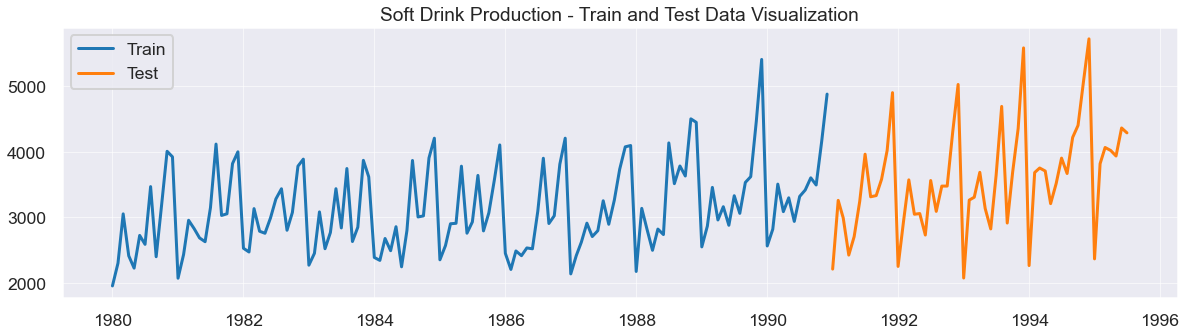

In [28]:
plt.figure(figsize=(20,5))
plt.plot(df_train,label='Train');
plt.plot(df_test,label='Test');
plt.legend()
plt.title('Soft Drink Production - Train and Test Data Visualization');  

# QUESTION4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
# define function for Mean Average Percent Error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


df Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

df Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187] 



YearMonth
1991-01-01    3466.213856
1991-02-01    3471.357423
1991-03-01    3476.500990
1991-04-01    3481.644556
1991-05-01    3486.788123
Name: RegOnTime, dtype: float64

SoftDrink_TEST RMSE  SoftDrink_MAPE
Linear Regression Model              775.808          17.417

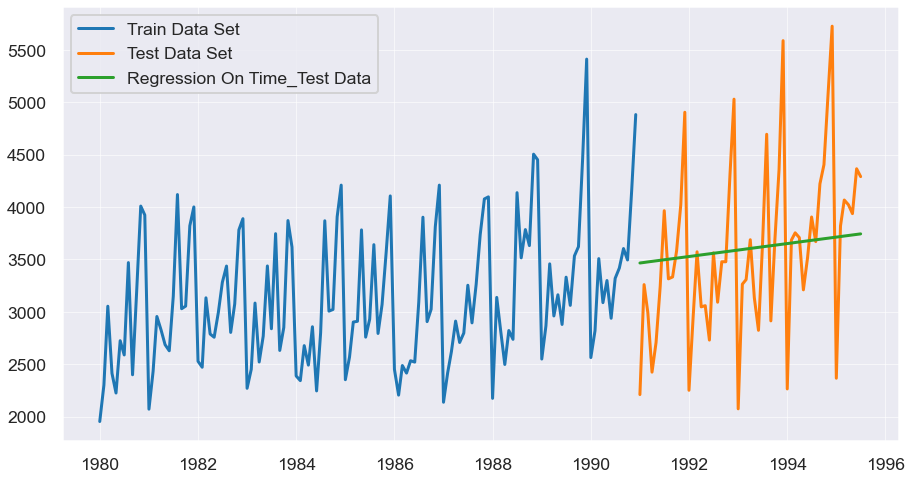

In [32]:
df_train_time = [i+1 for i in range(len(df_train))]
df_test_time = [i+133 for i in range(len(df_test))]
print('df Training Time instance','\n',df_train_time,'\n')
print('df Test Time instance','\n',df_test_time,'\n')

LinearRegression_train_df = df_train.copy()
LinearRegression_test_df = df_test.copy()
LinearRegression_train_df['time']=df_train_time
LinearRegression_test_df['time']=df_test_time

lr.fit(LinearRegression_train_df[['time']],
       LinearRegression_train_df['SoftDrinkProduction'])

test_predictions_model1         = lr.predict(LinearRegression_test_df[['time']])
LinearRegression_test_df['RegOnTime'] = test_predictions_model1
display(LinearRegression_test_df['RegOnTime'].head())

plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(LinearRegression_test_df['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
a=np.asarray(df_test['SoftDrinkProduction'])
b=np.asarray(LinearRegression_test_df['RegOnTime'])
MAPE=mean_absolute_percentage_error(a,b)
RMSE=mean_squared_error(a,b,squared=False)
RMSE_LinearRegression_Reg_df =pd.DataFrame({'SoftDrink_TEST RMSE':round(RMSE,3),
                                   'SoftDrink_MAPE':round(MAPE,3)},
                                  index=['Linear Regression Model'])
RMSE_LinearRegression_Reg_df


## Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 ¶

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

SoftDrink_TEST RMSE  SoftDrink_MAPE
Naive Regression Model             1519.259          44.275

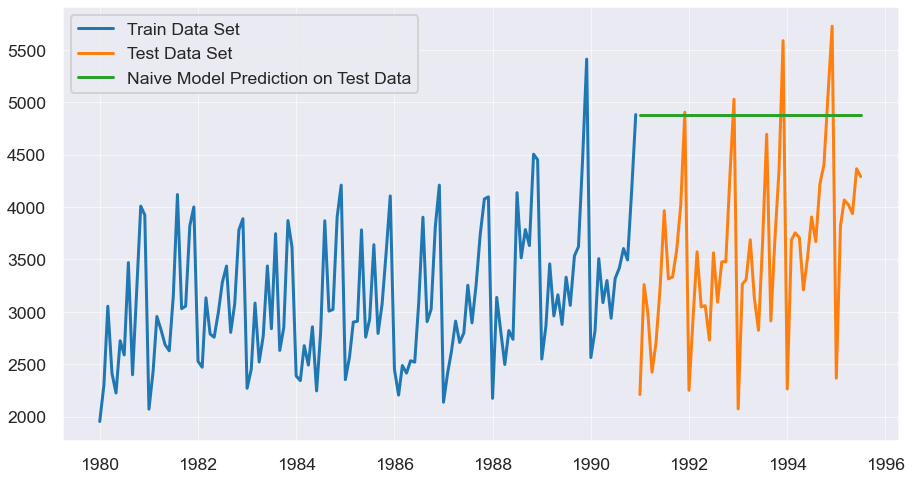

In [33]:
NaiveModel_train = df_train.copy()
NaiveModel_test = df_test.copy()
NaiveModel_test['naive'] = np.asarray(df_train['SoftDrinkProduction'])[len(np.asarray(df_train['SoftDrinkProduction']))-1]
display(NaiveModel_test['naive'].head())
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(NaiveModel_test['naive'], label='Naive Model Prediction on Test Data')

plt.legend(loc='best')
b=np.asarray(NaiveModel_test[['naive']])
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_Naive_Reg_df=pd.DataFrame({'SoftDrink_TEST RMSE':RMSE,
                                   'SoftDrink_MAPE':MAPE},
                                  index=['Naive Regression Model'])
RMSE_Naive_Reg_df  


In [34]:
Result=pd.concat([RMSE_LinearRegression_Reg_df,RMSE_Naive_Reg_df])
Result

SoftDrink_TEST RMSE  SoftDrink_MAPE
Linear Regression Model              775.808          17.417
Naive Regression Model              1519.259          44.275

###  Simple Average Method

SoftDrinkProduction  mean_forecast
YearMonth                                     
1991-01-01                 2211    3124.166667
1991-02-01                 3260    3124.166667
1991-03-01                 2992    3124.166667
1991-04-01                 2425    3124.166667
1991-05-01                 2707    3124.166667

SoftDrink_TEST RMSE  SoftDrink_MAPE
SIMPLE AVG Model              934.353          19.133

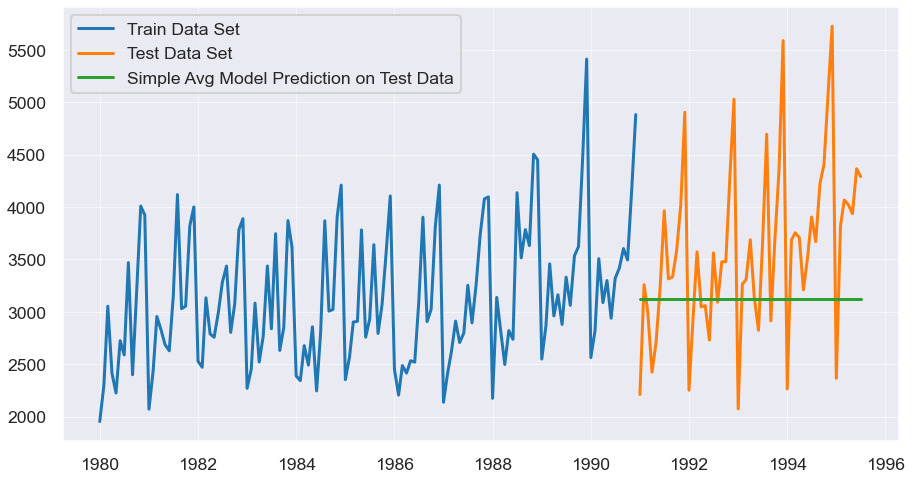

In [35]:
SimpleAvgModel_train = df_train.copy()
SimpleAvgModel_test = df_test.copy()
SimpleAvgModel_test['mean_forecast'] = df_train['SoftDrinkProduction'].mean()
display(SimpleAvgModel_test.head())

plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(SimpleAvgModel_test['mean_forecast'], label='Simple Avg Model Prediction on Test Data')
plt.legend(loc='best')

b=np.asarray(SimpleAvgModel_test['mean_forecast'])

MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_SimpleAvg_Reg_df =pd.DataFrame({'SoftDrink_TEST RMSE':RMSE,
                                   'SoftDrink_MAPE':MAPE},
                                  index=['SIMPLE AVG Model'])
RMSE_SimpleAvg_Reg_df


In [36]:
Result=pd.concat([Result,RMSE_SimpleAvg_Reg_df])
Result

SoftDrink_TEST RMSE  SoftDrink_MAPE
Linear Regression Model              775.808          17.417
Naive Regression Model              1519.259          44.275
SIMPLE AVG Model                     934.353          19.133

### Simple Exponential Model

In [37]:
df_test['SoftDrinkProduction']

YearMonth
1991-01-01    2211
1991-02-01    3260
1991-03-01    2992
1991-04-01    2425
1991-05-01    2707
1991-06-01    3244
1991-07-01    3965
1991-08-01    3315
1991-09-01    3333
1991-10-01    3583
1991-11-01    4021
1991-12-01    4904
1992-01-01    2252
1992-02-01    2952
1992-03-01    3573
1992-04-01    3048
1992-05-01    3059
1992-06-01    2731
1992-07-01    3563
1992-08-01    3092
1992-09-01    3478
1992-10-01    3478
1992-11-01    4308
1992-12-01    5029
1993-01-01    2075
1993-02-01    3264
1993-03-01    3308
1993-04-01    3688
1993-05-01    3136
1993-06-01    2824
1993-07-01    3644
1993-08-01    4694
1993-09-01    2914
1993-10-01    3686
1993-11-01    4358
1993-12-01    5587
1994-01-01    2265
1994-02-01    3685
1994-03-01    3754
1994-04-01    3708
1994-05-01    3210
1994-06-01    3517
1994-07-01    3905
1994-08-01    3670
1994-09-01    4221
1994-10-01    4404
1994-11-01    5086
1994-12-01    5725
1995-01-01    2367
1995-02-01    3819
1995-03-01    4067
1995-04-01    4022
19



SES Model best parameters for SoftDrinkProduction


{'smoothing_level': 0.11907309094689855,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2572.9666666666653,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of SoftDrinkProduction


1991-01-01    3656.847753
1991-02-01    3656.847753
1991-03-01    3656.847753
1991-04-01    3656.847753
1991-05-01    3656.847753
Freq: MS, dtype: float64

SoftDrink_TEST RMSE  SoftDrink_MAPE
SES Model, Alpha=0.0987              809.502          18.997

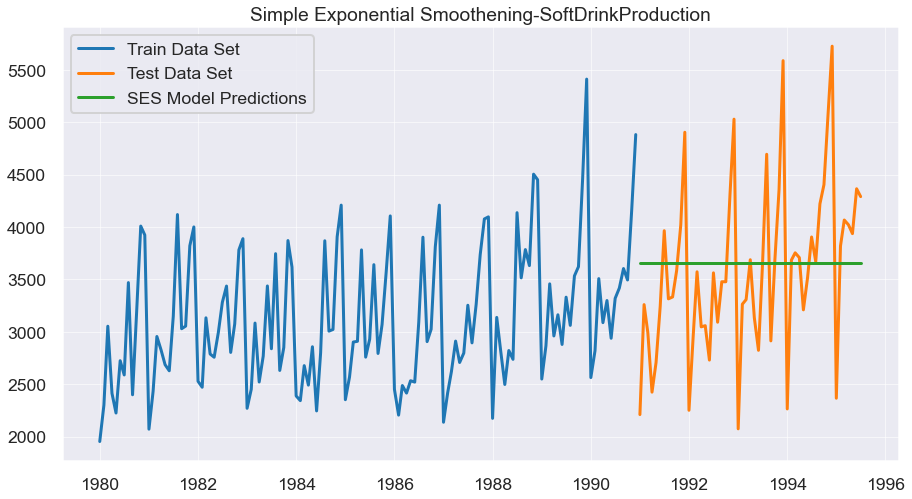

In [38]:
model_SES_df=SimpleExpSmoothing(df_train,initialization_method='estimated')
model_SES_df=model_SES_df.fit(optimized=True)
print('\n')
print('SES Model best parameters for SoftDrinkProduction')
display(model_SES_df.params)
SES_df_predict=model_SES_df.forecast(steps=len(df_test))
print('Predictions for test data of SoftDrinkProduction')
display(SES_df_predict.head())
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(SES_df_predict,label='SES Model Predictions');
plt.legend(loc='best');
plt.title('Simple Exponential Smoothening-SoftDrinkProduction');
a=np.asarray(df_test['SoftDrinkProduction'])
b=np.asarray(SES_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_SES_df=pd.DataFrame({'SoftDrink_TEST RMSE':RMSE,
                           'SoftDrink_MAPE':MAPE},
                           index=['SES Model, Alpha=0.0987'])
RMSE_SES_df   


In [39]:
Result=pd.concat([Result,RMSE_SES_df])
Result

SoftDrink_TEST RMSE  SoftDrink_MAPE
Linear Regression Model              775.808          17.417
Naive Regression Model              1519.259          44.275
SIMPLE AVG Model                     934.353          19.133
SES Model, Alpha=0.0987              809.502          18.997

### Double Exponential Smoothening - Holt Model



DES Model best parameters for SoftDrinkProduction


{'smoothing_level': 0.12266127608459183,
 'smoothing_trend': 0.10613695867818362,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2143.031527536588,
 'initial_trend': 41.34409733604201,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of SoftDrinkProduction


1991-01-01    3726.462538
1991-02-01    3750.283901
1991-03-01    3774.105264
1991-04-01    3797.926627
1991-05-01    3821.747990
1991-06-01    3845.569353
1991-07-01    3869.390716
1991-08-01    3893.212079
1991-09-01    3917.033442
1991-10-01    3940.854805
1991-11-01    3964.676168
1991-12-01    3988.497531
1992-01-01    4012.318894
1992-02-01    4036.140257
1992-03-01    4059.961620
1992-04-01    4083.782983
1992-05-01    4107.604346
1992-06-01    4131.425709
1992-07-01    4155.247072
1992-08-01    4179.068435
1992-09-01    4202.889798
1992-10-01    4226.711161
1992-11-01    4250.532524
1992-12-01    4274.353887
1993-01-01    4298.175250
1993-02-01    4321.996613
1993-03-01    4345.817976
1993-04-01    4369.639339
1993-05-01    4393.460702
1993-06-01    4417.282065
1993-07-01    4441.103428
1993-08-01    4464.924791
1993-09-01    4488.746154
1993-10-01    4512.567517
1993-11-01    4536.388880
1993-12-01    4560.210243
1994-01-01    4584.031606
1994-02-01    4607.852969
1994-03-01  

SoftDrink_TEST RMSE  SoftDrink_MAPE
DES Model,Alpha=1.91e-08,Beta=7.30e-09             1064.782          29.955

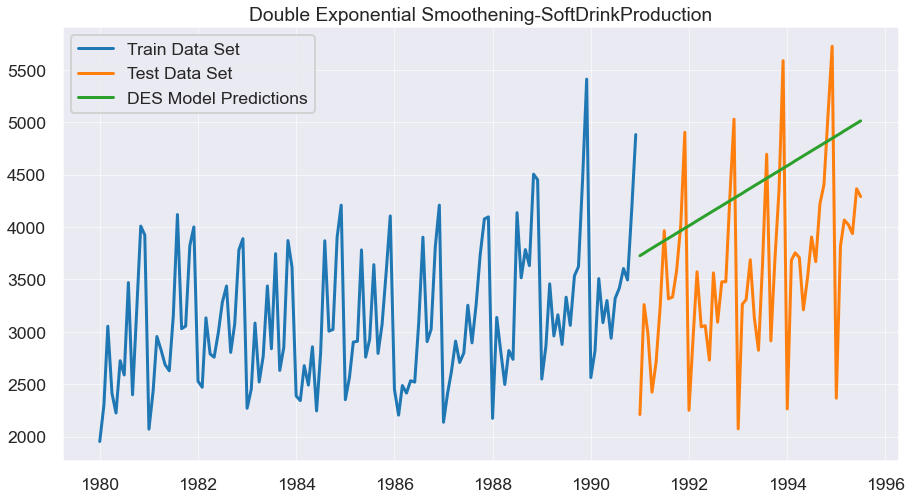

In [40]:
model_DES_df=Holt(df_train,initialization_method='estimated')
model_DES_df=model_DES_df.fit(optimized=True)
print('\n')
print('DES Model best parameters for SoftDrinkProduction')
display(model_DES_df.params)
DES_df_predict=model_DES_df.forecast(steps=len(df_test))
print('Predictions for test data of SoftDrinkProduction')
display(DES_df_predict)
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(DES_df_predict,label='DES Model Predictions');
plt.legend(loc='best');
plt.title('Double Exponential Smoothening-SoftDrinkProduction');
b=np.asarray(DES_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_DES_df=pd.DataFrame({'SoftDrink_TEST RMSE':RMSE,
                           'SoftDrink_MAPE':MAPE},
                           index=['DES Model,Alpha=1.91e-08,Beta=7.30e-09'])
RMSE_DES_df  


In [41]:
Result=pd.concat([Result,RMSE_DES_df])
Result

SoftDrink_TEST RMSE  SoftDrink_MAPE
Linear Regression Model                             775.808          17.417
Naive Regression Model                             1519.259          44.275
SIMPLE AVG Model                                    934.353          19.133
SES Model, Alpha=0.0987                             809.502          18.997
DES Model,Alpha=1.91e-08,Beta=7.30e-09             1064.782          29.955

### Holt Winters Model ( with sesonality and trend ,additive)



TES_ADD Model best parameters for SoftDrinkProduction


{'smoothing_level': 0.13167460248743373,
 'smoothing_trend': 0.03228706183486575,
 'smoothing_seasonal': 0.24021329725110144,
 'damping_trend': nan,
 'initial_level': 2818.6543099220835,
 'initial_trend': 4.671025358666376,
 'initial_seasons': array([-799.16032297, -578.80040163,   -8.9937011 , -346.8281034 ,
        -332.83887374, -219.00651219,  -40.20714406,  649.05097298,
        -212.77222351,   84.46571788,  865.5839579 ,  954.97753576]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of SoftDrinkProduction


1991-01-01    2597.216402
1991-02-01    2909.225289
1991-03-01    3306.043928
1991-04-01    3026.503773
1991-05-01    3226.794337
Freq: MS, dtype: float64

SoftDrink_TEST RMSE  \
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...              448.198   

                                                    SoftDrink_MAPE  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...          11.117

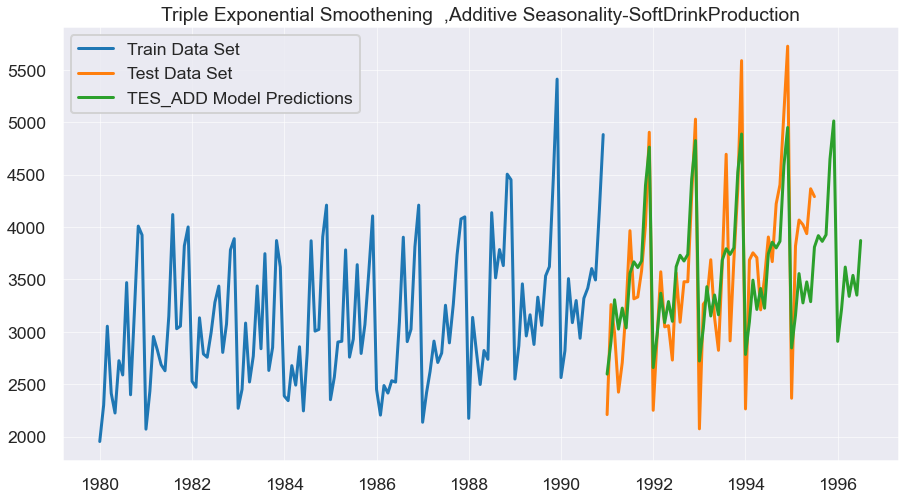

In [42]:
model_TES_ADD_df=ExponentialSmoothing(df_train,initialization_method='estimated',seasonal='add',trend='add')
model_TES_ADD_df=model_TES_ADD_df.fit(optimized=True)
print('\n')
print('TES_ADD Model best parameters for SoftDrinkProduction')
display(model_TES_ADD_df.params)
TES_ADD_df_predict_1yrahead=model_TES_ADD_df.forecast(steps=len(df_test)+12)
TES_ADD_df_predict=model_TES_ADD_df.forecast(steps=len(df_test))
print('Predictions for test data of SoftDrinkProduction')
display(TES_ADD_df_predict.head())
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(TES_ADD_df_predict_1yrahead,label='TES_ADD Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening  ,Additive Seasonality-SoftDrinkProduction');

b=np.asarray(TES_ADD_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_TES_ADD_df=pd.DataFrame({'SoftDrink_TEST RMSE':RMSE,
                               'SoftDrink_MAPE':MAPE},
                               index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
RMSE_TES_ADD_df     


In [43]:
a_train=np.asarray(df_train['SoftDrinkProduction'])
a_train

array([1954, 2302, 3054, 2414, 2226, 2725, 2589, 3470, 2400, 3180, 4009,
       3924, 2072, 2434, 2956, 2828, 2687, 2629, 3150, 4119, 3030, 3055,
       3821, 4001, 2529, 2472, 3134, 2789, 2758, 2993, 3282, 3437, 2804,
       3076, 3782, 3889, 2271, 2452, 3084, 2522, 2769, 3438, 2839, 3746,
       2632, 2851, 3871, 3618, 2389, 2344, 2678, 2492, 2858, 2246, 2800,
       3869, 3007, 3023, 3907, 4209, 2353, 2570, 2903, 2910, 3782, 2759,
       2931, 3641, 2794, 3070, 3576, 4106, 2452, 2206, 2488, 2416, 2534,
       2521, 3093, 3903, 2907, 3025, 3812, 4209, 2138, 2419, 2622, 2912,
       2708, 2798, 3254, 2895, 3263, 3736, 4077, 4097, 2175, 3138, 2823,
       2498, 2822, 2738, 4137, 3515, 3785, 3632, 4504, 4451, 2550, 2867,
       3458, 2961, 3163, 2880, 3331, 3062, 3534, 3622, 4464, 5411, 2564,
       2820, 3508, 3088, 3299, 2939, 3320, 3418, 3604, 3495, 4163, 4882],
      dtype=int64)

In [44]:
TES_ADD_df_predict_train=model_TES_ADD_df.predict(start=0,end=(len(df_train)-1))
TES_ADD_df_predict_train
b_train=np.asarray(TES_ADD_df_predict_train)
b_train

array([2024.16501231, 2239.65871035, 2822.31193911, 2520.60772921,
       2525.72895697, 2603.98989222, 2803.13294384, 3467.69455446,
       2609.68409178, 2881.9296809 , 3706.18114085, 3840.62060064,
       2086.13392925, 2341.92926502, 2970.39683577, 2555.20052863,
       2565.67694919, 2804.02410022, 2885.99983399, 3669.86222568,
       2826.01659797, 3282.71078278, 4044.64532083, 4060.58677357,
       2266.77951636, 2588.57879783, 3167.21386401, 2821.66447155,
       2757.37002077, 2909.96294281, 3133.79987058, 3948.81617028,
       2917.39190409, 3225.09178342, 3995.18391003, 4048.78527001,
       2315.53417601, 2501.09228079, 3104.06912973, 2755.86857646,
       2667.70906879, 2848.41034999, 3151.81256852, 3742.83271296,
       2872.36708904, 3151.67374867, 3882.66793878, 3972.74495932,
       2237.79268389, 2445.14743997, 3045.13777226, 2595.30017955,
       2600.8186369 , 2915.98097725, 2828.04420401, 3524.95781512,
       2634.81989566, 2976.84450979, 3820.95235341, 3839.92181

In [45]:
RMSE_Train=mean_squared_error(a_train,b_train,squared=False)
RMSE_Train

308.0596261534253

In [46]:
MAPE_Train=mean_absolute_percentage_error(a_train,b_train)
MAPE_Train

7.339123936308249

In [47]:
Result=pd.concat([Result,RMSE_TES_ADD_df])
Result

SoftDrink_TEST RMSE  \
Linear Regression Model                                         775.808   
Naive Regression Model                                         1519.259   
SIMPLE AVG Model                                                934.353   
SES Model, Alpha=0.0987                                         809.502   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                         1064.782   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...              448.198   

                                                    SoftDrink_MAPE  
Linear Regression Model                                     17.417  
Naive Regression Model                                      44.275  
SIMPLE AVG Model                                            19.133  
SES Model, Alpha=0.0987                                     18.997  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                      29.955  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...          11.117

### Holt Winters Model ( with sesonality and trend ,multiplicative seasonality)



TES_MULT Model best parameters for SoftDrinkProduction


{'smoothing_level': 0.11107205323498645,
 'smoothing_trend': 0.04936537982835477,
 'smoothing_seasonal': 0.230462952024982,
 'damping_trend': nan,
 'initial_level': 2803.208688691837,
 'initial_trend': 15.6758852288812,
 'initial_seasons': array([0.79234556, 0.86540969, 1.04081794, 0.93154862, 0.95321163,
        0.97687575, 1.04072294, 1.27211679, 1.00498107, 1.07628246,
        1.34040527, 1.39140597]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of SoftDrinkProduction


1991-01-01    2565.454769
1991-02-01    2890.069194
1991-03-01    3296.776543
1991-04-01    3008.139428
1991-05-01    3214.454451
Freq: MS, dtype: float64

SoftDrink_TEST RMSE  \
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...              447.543   

                                                    SoftDrink_MAPE  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...          10.919

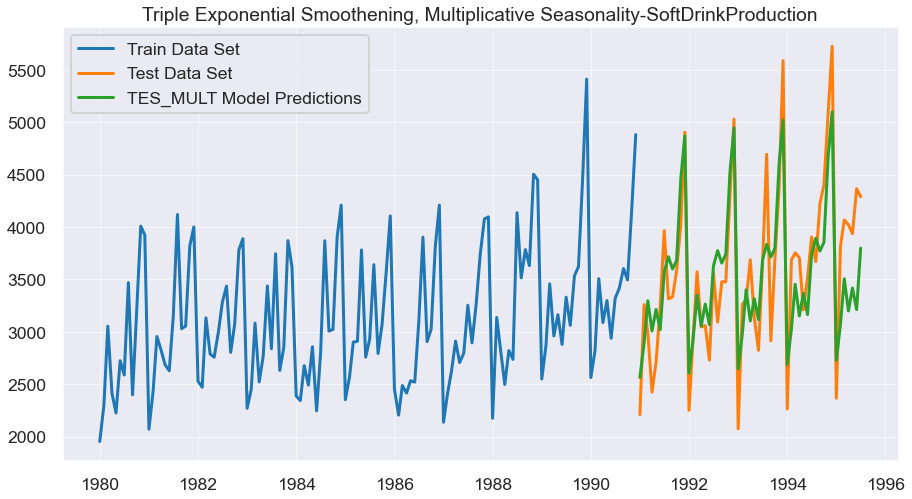

In [48]:
model_TES_MULT_df=ExponentialSmoothing(df_train,initialization_method='estimated',seasonal='mul',trend='add')
model_TES_MULT_df=model_TES_MULT_df.fit(optimized=True)
print('\n')
print('TES_MULT Model best parameters for SoftDrinkProduction')
display(model_TES_MULT_df.params)
TES_MULT_df_predict=model_TES_MULT_df.forecast(steps=len(df_test))
print('Predictions for test data of SoftDrinkProduction')
display(TES_MULT_df_predict.head())
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(TES_MULT_df_predict,label='TES_MULT Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening, Multiplicative Seasonality-SoftDrinkProduction');

b=np.asarray(TES_MULT_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_TES_MULT_df=pd.DataFrame({'SoftDrink_TEST RMSE':RMSE,
                                'SoftDrink_MAPE':MAPE},
                                index=['TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gamma = 8.3567e-07'])
RMSE_TES_MULT_df        


In [49]:
Result=pd.concat([Result,RMSE_TES_MULT_df])
Result

SoftDrink_TEST RMSE  \
Linear Regression Model                                         775.808   
Naive Regression Model                                         1519.259   
SIMPLE AVG Model                                                934.353   
SES Model, Alpha=0.0987                                         809.502   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                         1064.782   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...              448.198   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...              447.543   

                                                    SoftDrink_MAPE  
Linear Regression Model                                     17.417  
Naive Regression Model                                      44.275  
SIMPLE AVG Model                                            19.133  
SES Model, Alpha=0.0987                                     18.997  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                      29.955  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...          11.117  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...          10.919

# QUESTION5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


In [50]:
# Define the function for testing staionarity


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean() #determining the rolling mean 0f 6 months
    rolstd = timeseries.rolling(window=6).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='6 month Rolling Mean')
    std = plt.plot(rolstd, color='orange', label = '6 month Rolling Std Deviation')
   
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

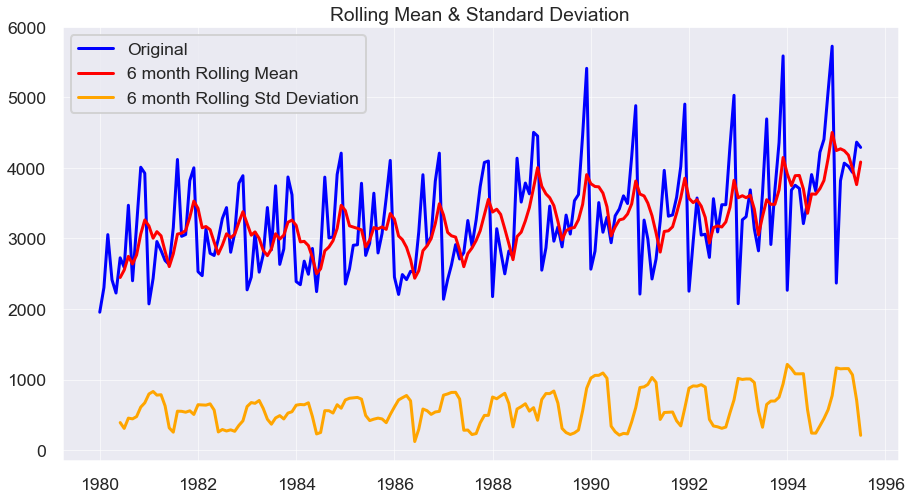

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [51]:
test_stationarity(df['SoftDrinkProduction'])

p-value is more than 0.05, therefore the data is not stationary

Try to make the series stationary by one level of differnecing

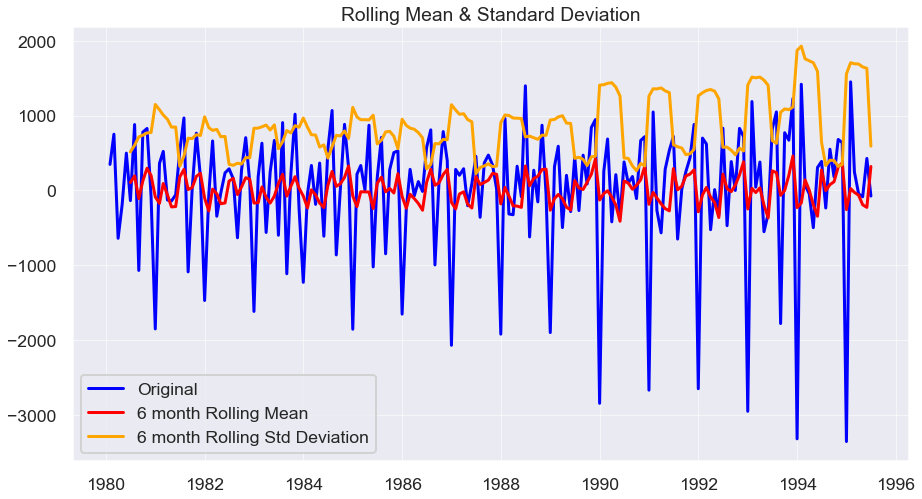

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [52]:
test_stationarity(df['SoftDrinkProduction'].diff().dropna())

Data is now stationary

# QUESTION6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA Model

We shall test the train data set only for Staionarity

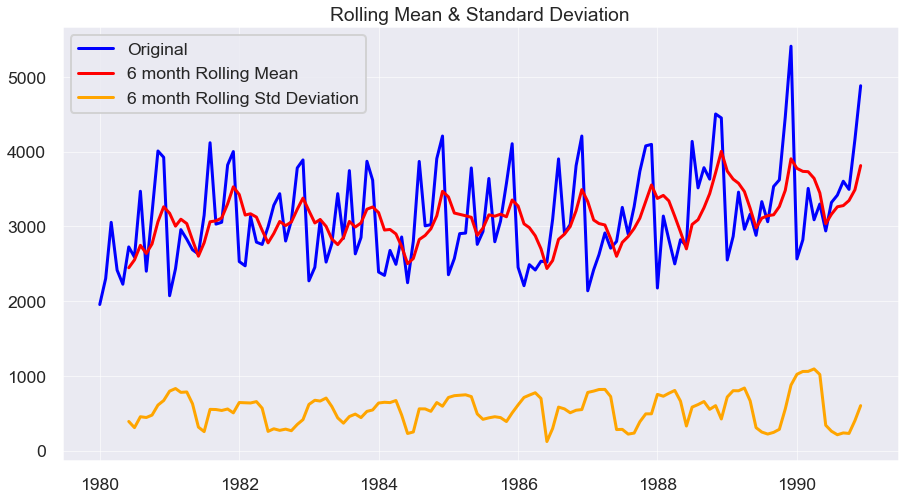

Results of Dickey-Fuller Test:
Test Statistic                  -0.990112
p-value                          0.756854
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [53]:
test_stationarity(df_train)

alpha = 0.2194 , is higher than 0.05, so null hypothesis that data is not stationary can not be rejected

do one level of differencing and then check for staionarity again

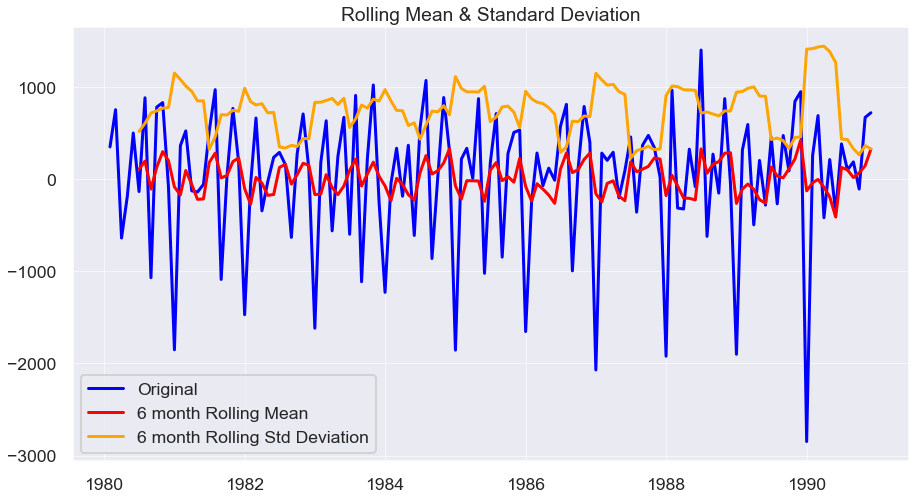

Results of Dickey-Fuller Test:
Test Statistic                -7.299886e+00
p-value                        1.347278e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [54]:
test_stationarity(df_train.diff().dropna())

After one level of differencing , d=1 , data has now become stationary , as the alpha value is less than 0.05.

### Using the AIC method for the SoftDrinkProduction Data Set

In [55]:
df_df=df.copy()
train_df=df_train.copy()
test_df=df_test.copy()

In [56]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [57]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_df = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_df

Empty DataFrame
Columns: [param, AIC]
Index: []

In [58]:
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    ARIMA_model = ARIMA(train_df['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.599630211392
ARIMA(0, 1, 2) - AIC:2056.489263243463
ARIMA(0, 1, 3) - AIC:2056.8317894192724
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.5230839350725
ARIMA(1, 1, 2) - AIC:2056.7156820689142
ARIMA(1, 1, 3) - AIC:2058.7121590365814
ARIMA(2, 1, 0) - AIC:2073.2348605360226
ARIMA(2, 1, 1) - AIC:2059.1006718136123
ARIMA(2, 1, 2) - AIC:2058.7127020996977
ARIMA(2, 1, 3) - AIC:2057.0895952227493
ARIMA(3, 1, 0) - AIC:2070.365367141177
ARIMA(3, 1, 1) - AIC:2058.3045462290725
ARIMA(3, 1, 2) - AIC:2060.6799657045794
ARIMA(3, 1, 3) - AIC:2059.5839101344054


In [59]:
ARIMA_AIC_df.sort_values(by='AIC',ascending=True).round(2).head()

param      AIC
2   (0, 1, 2)  2056.49
6   (1, 1, 2)  2056.72
3   (0, 1, 3)  2056.83
11  (2, 1, 3)  2057.09
13  (3, 1, 1)  2058.30

In [60]:
auto_ARIMA = ARIMA(train_df, order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(2, 1, 3)   Log Likelihood               -1022.545
Date:                 Wed, 25 Jan 2023   AIC                           2057.090
Time:                         09:04:55   BIC                           2074.341
Sample:                     01-01-1980   HQIC                          2064.100
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7384      0.193      3.824      0.000       0.360       1.117
ar.L2          0.1606      0.220      0.730      0.465      -0.271       0.592
ma.L1         -1.3910      0.214     -6.500 

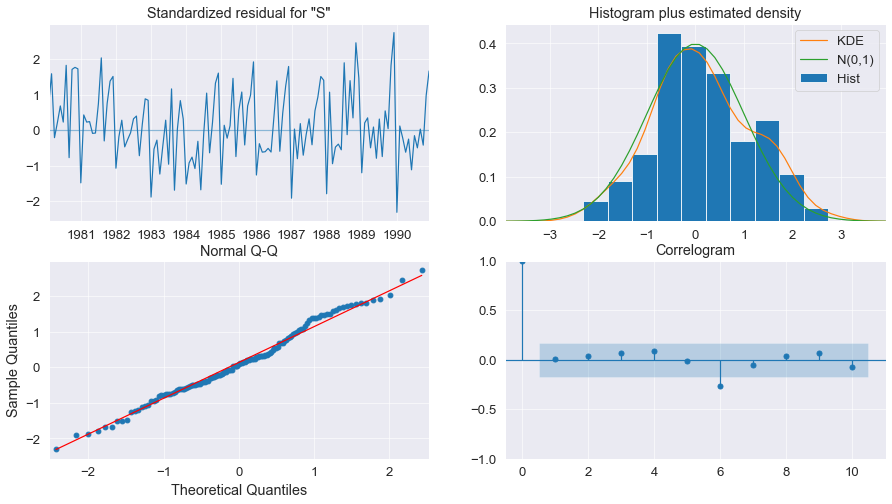

In [61]:
sns.set_context("paper", font_scale = 1.5, rc={"grid.linewidth": 0.6})
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test_df Set using this model and evaluate the model.

In [62]:
predicted_auto_ARIMA_2yrs = results_auto_ARIMA.forecast(steps=len(test_df)+24)
predicted_auto_ARIMA= results_auto_ARIMA.forecast(steps=len(test_df))
#predicted_auto_ARIMA

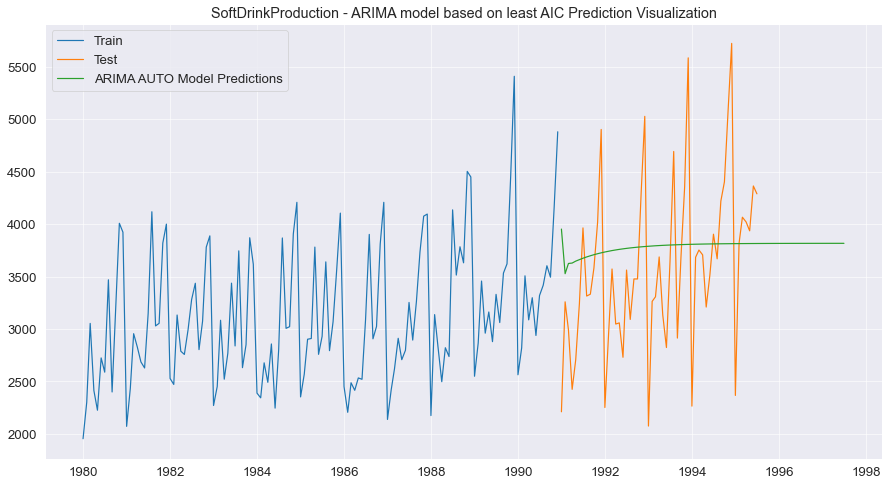

In [63]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('SoftDrinkProduction - ARIMA model based on least AIC Prediction Visualization');  
plt.plot(predicted_auto_ARIMA_2yrs,label = 'ARIMA AUTO Model Predictions');
plt.legend(loc='best');

In [64]:
b=np.asarray(predicted_auto_ARIMA)
RMSE = mean_squared_error(a,b,squared=False)
MAPE = mean_absolute_percentage_error(a,b)
RMSE_ARIMA_AUTO = pd.DataFrame({'SoftDrink_TEST RMSE': RMSE,
                               'SoftDrink_MAPE':MAPE}
                           ,index=['ARIMA_AUTO(2,1,3)'])
RMSE_ARIMA_AUTO

SoftDrink_TEST RMSE  SoftDrink_MAPE
ARIMA_AUTO(2,1,3)           816.455897       19.952546

In [65]:
Result=pd.concat([Result,RMSE_ARIMA_AUTO])
Result

SoftDrink_TEST RMSE  \
Linear Regression Model                                      775.808000   
Naive Regression Model                                      1519.259000   
SIMPLE AVG Model                                             934.353000   
SES Model, Alpha=0.0987                                      809.502000   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                      1064.782000   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...           448.198000   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...           447.543000   
ARIMA_AUTO(2,1,3)                                            816.455897   

                                                    SoftDrink_MAPE  
Linear Regression Model                                  17.417000  
Naive Regression Model                                   44.275000  
SIMPLE AVG Model                                         19.133000  
SES Model, Alpha=0.0987                                  18.997000  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                   29.955000  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...       11.117000  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...       10.919000  
ARIMA_AUTO(2,1,3)                                        19.952546

### SARIMA models based on least AIC

Plot the ACF and PACF plots again



In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

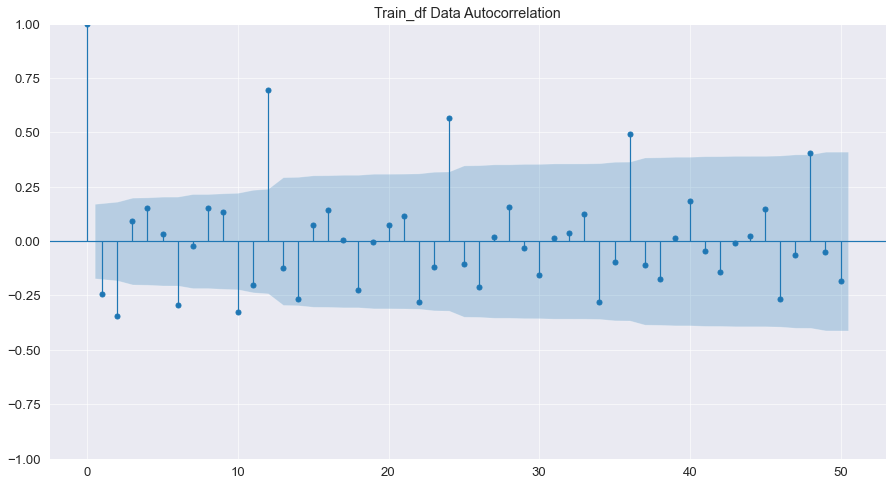

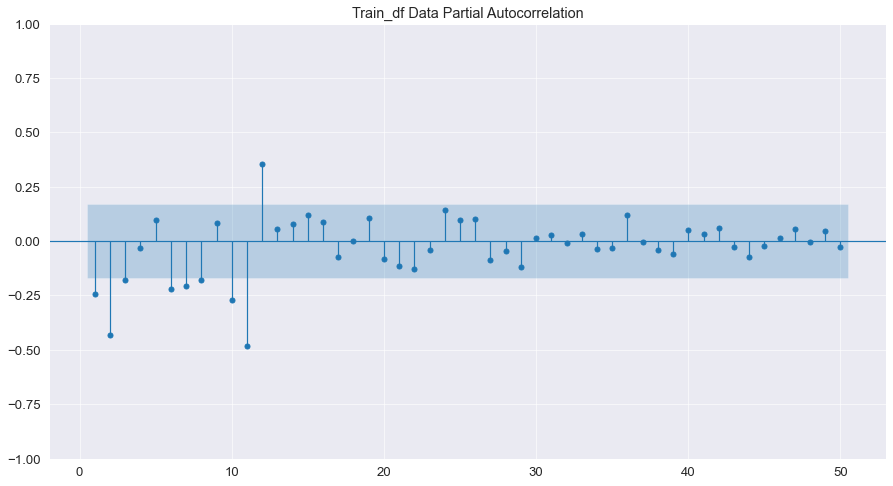

In [67]:
plot_acf(train_df.diff().dropna(),
         title='Train_df Data Autocorrelation',
        lags=50)
plot_pacf(train_df.diff(1).dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

We shall take seasaonality as 12 ( f ) and differencing has been done only once , so d = 1

In [68]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [69]:
SARIMA_AIC_df = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_df

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [70]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_df['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_df = SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.2200937706552
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.5491793653455
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3452.517362198904
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.866280699666
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238898835
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.5155744481328
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3546.8525402341793
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283978432
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.801403955362
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3562.8800527677968
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1431.8195214429536
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1433.6836345123431
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1435.6483732619652
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:6902.430356474104
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.487178390802
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.5369694844346
SARIMA(0, 1, 1)x

KeyboardInterrupt: 

In [71]:
SARIMA_AIC_df.sort_values(by=['AIC']).head()

param       seasonal          AIC
28  (0, 1, 1)  (3, 0, 0, 12)  1391.515931
29  (0, 1, 1)  (3, 0, 1, 12)  1391.678481
44  (0, 1, 2)  (3, 0, 0, 12)  1392.092390
45  (0, 1, 2)  (3, 0, 1, 12)  1392.889692
30  (0, 1, 1)  (3, 0, 2, 12)  1393.254223

In [72]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train_df['SoftDrinkProduction'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                     SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -668.639
Date:                                 Wed, 25 Jan 2023   AIC                           1357.277
Time:                                         09:06:59   BIC                           1382.495
Sample:                                     01-01-1980   HQIC                          1367.456
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1000      0.143      0.701      0.483      -0.180       0

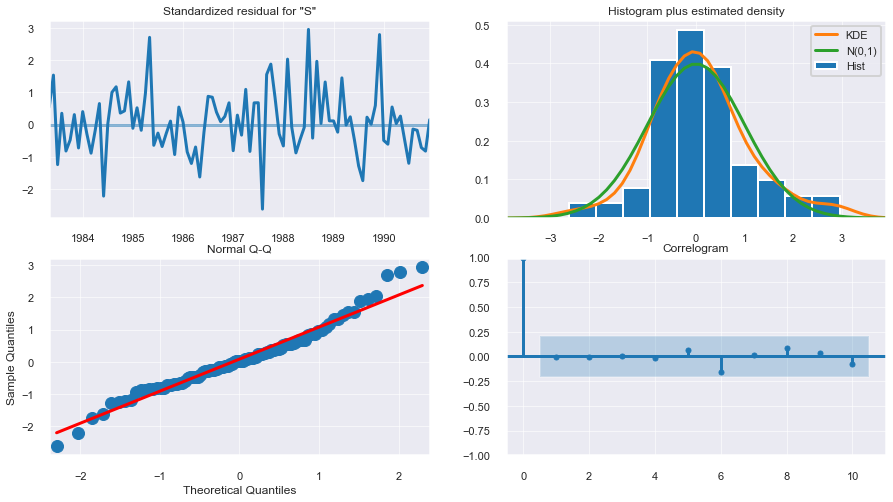

In [73]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
results_auto_SARIMA.plot_diagnostics();

### Predict on the Test_df Set using this model and evaluate the model.

In [74]:
predicted_auto_SARIMA_2yrs = results_auto_SARIMA.get_forecast(steps=len(test_df)+24)
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test_df))
SARIMA_auto_2Yrs=predicted_auto_SARIMA_2yrs.summary_frame(alpha=0.05)
display(SARIMA_auto_2Yrs.round(3).head())
SARIMA_auto_2Yrs['mean'].round(3).head()

SoftDrinkProduction      mean  mean_se  mean_ci_lower  mean_ci_upper
1991-01-01           2620.293  342.827       1948.364       3292.221
1991-02-01           2987.173  348.256       2304.604       3669.741
1991-03-01           3404.446  349.093       2720.237       4088.655
1991-04-01           3066.760  353.309       2374.287       3759.232
1991-05-01           3270.284  355.193       2574.119       3966.450

1991-01-01    2620.293
1991-02-01    2987.173
1991-03-01    3404.446
1991-04-01    3066.760
1991-05-01    3270.284
Freq: MS, Name: mean, dtype: float64

In [75]:
b=np.asarray(predicted_auto_SARIMA.predicted_mean)
RMSE= mean_squared_error(a,b,squared=False)
MAPE = mean_absolute_percentage_error(test_df['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
RMSE_SARIMA_AUTO = pd.DataFrame({'SoftDrink_TEST RMSE': RMSE,
                               'SoftDrink_MAPE':MAPE},
                                index=['SARIMA_AUTO(3,1,1)(3,0,2,12)'])
RMSE_SARIMA_AUTO

SoftDrink_TEST RMSE  SoftDrink_MAPE
SARIMA_AUTO(3,1,1)(3,0,2,12)           427.633963       10.875734

In [76]:
Result=pd.concat([Result,RMSE_SARIMA_AUTO])
Result

SoftDrink_TEST RMSE  \
Linear Regression Model                                      775.808000   
Naive Regression Model                                      1519.259000   
SIMPLE AVG Model                                             934.353000   
SES Model, Alpha=0.0987                                      809.502000   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                      1064.782000   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...           448.198000   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...           447.543000   
ARIMA_AUTO(2,1,3)                                            816.455897   
SARIMA_AUTO(3,1,1)(3,0,2,12)                                 427.633963   

                                                    SoftDrink_MAPE  
Linear Regression Model                                  17.417000  
Naive Regression Model                                   44.275000  
SIMPLE AVG Model                                         19.133000  
SES Model, Alpha=0.0987                                  18.997000  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                   29.955000  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...       11.117000  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...       10.919000  
ARIMA_AUTO(2,1,3)                                        19.952546  
SARIMA_AUTO(3,1,1)(3,0,2,12)                             10.875734

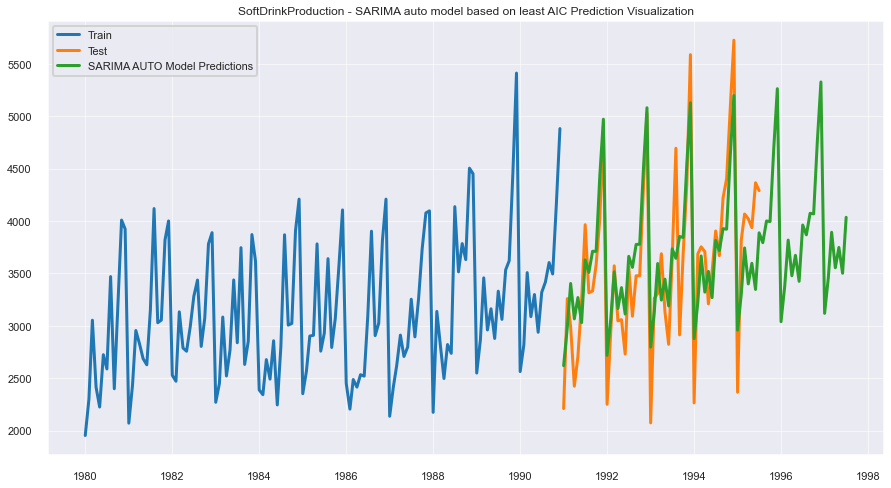

In [77]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('SoftDrinkProduction - SARIMA auto model based on least AIC Prediction Visualization');  
plt.plot(SARIMA_auto_2Yrs['mean'],label = 'SARIMA AUTO Model Predictions');
plt.legend(loc='best');

# QUESTION7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## ARIMA Manual Model

Now we shall plot the ACF and PACF plots OF THE DIFFERENCED DATA

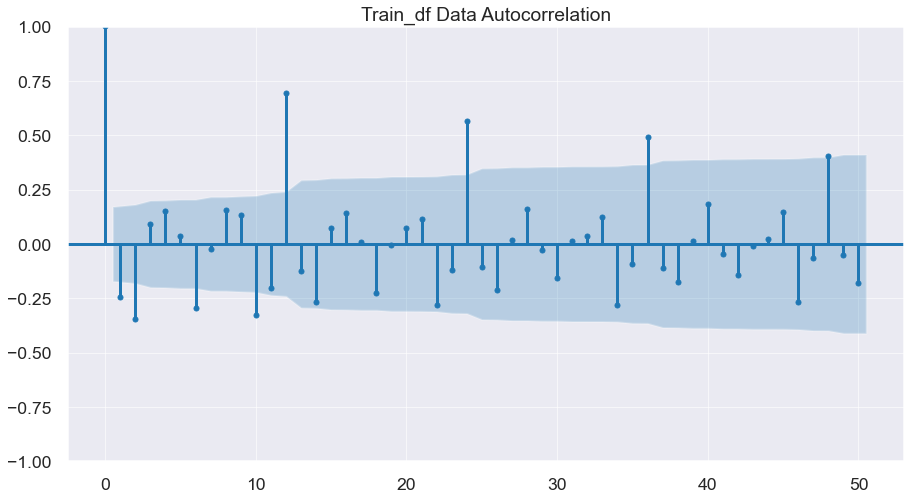

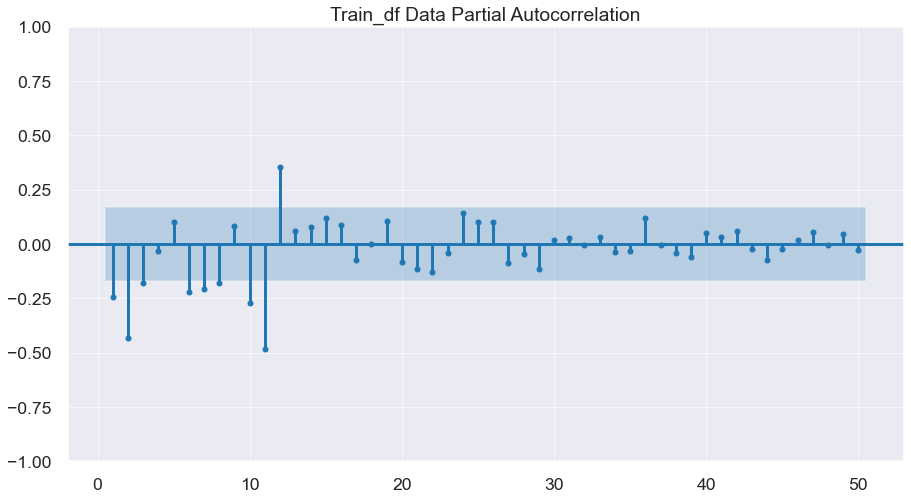

In [78]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})
plot_acf(train_df.diff().dropna(),
         title='Train_df Data Autocorrelation',
         lags=50);
plot_pacf(train_df.diff().dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off after 2.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off after 2.


p=2,d=1,q=2

In [79]:
manual_ARIMA = ARIMA(train_df['SoftDrinkProduction'], order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(2, 1, 2)   Log Likelihood               -1024.356
Date:                 Wed, 25 Jan 2023   AIC                           2058.713
Time:                         09:07:03   BIC                           2073.089
Sample:                     01-01-1980   HQIC                          2064.554
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2838      0.304     -0.933      0.351      -0.880       0.312
ar.L2         -0.0078      0.179     -0.044      0.965      -0.359       0.343
ma.L1         -0.3008      0.263     -1.145 

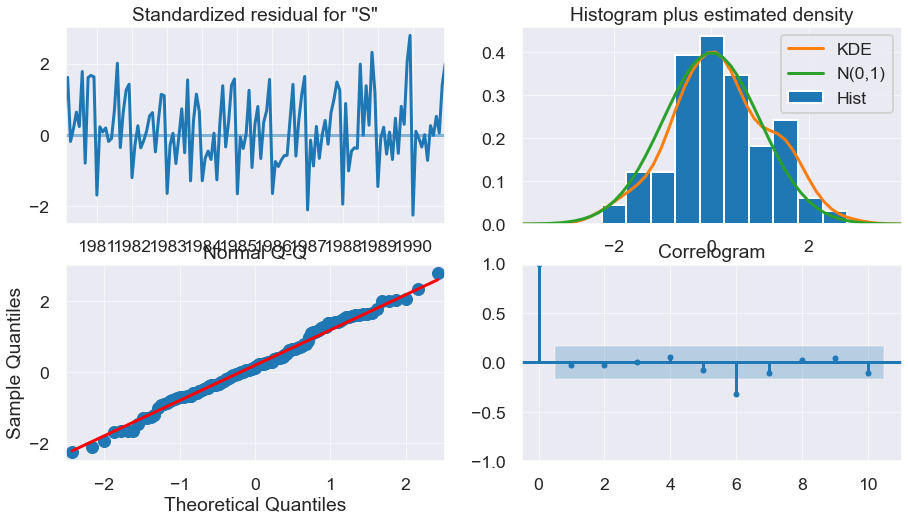

In [80]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test_df Set using this model and evaluate the model.

In [81]:
predicted_manual_ARIMA_2yrs = results_manual_ARIMA.forecast(steps=len(test_df)+24)
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_df))

In [82]:
b=np.asarray(predicted_manual_ARIMA)
RMSE= mean_squared_error(a,b,squared=False)
MAPE= mean_absolute_percentage_error(a,b)
RMSE_ARIMA_MANUAL = pd.DataFrame({'SoftDrink_TEST RMSE': RMSE,
                               'SoftDrink_MAPE':MAPE},
                                index=['ARIMA_MANUAL(2,1,2)'])
RMSE_ARIMA_MANUAL

SoftDrink_TEST RMSE  SoftDrink_MAPE
ARIMA_MANUAL(2,1,2)           823.030515       18.382282

In [83]:
Result=pd.concat([Result,RMSE_ARIMA_MANUAL])
Result

SoftDrink_TEST RMSE  \
Linear Regression Model                                      775.808000   
Naive Regression Model                                      1519.259000   
SIMPLE AVG Model                                             934.353000   
SES Model, Alpha=0.0987                                      809.502000   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                      1064.782000   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...           448.198000   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...           447.543000   
ARIMA_AUTO(2,1,3)                                            816.455897   
SARIMA_AUTO(3,1,1)(3,0,2,12)                                 427.633963   
ARIMA_MANUAL(2,1,2)                                          823.030515   

                                                    SoftDrink_MAPE  
Linear Regression Model                                  17.417000  
Naive Regression Model                                   44.275000  
SIMPLE AVG Model                                         19.133000  
SES Model, Alpha=0.0987                                  18.997000  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                   29.955000  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...       11.117000  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...       10.919000  
ARIMA_AUTO(2,1,3)                                        19.952546  
SARIMA_AUTO(3,1,1)(3,0,2,12)                             10.875734  
ARIMA_MANUAL(2,1,2)                                      18.382282

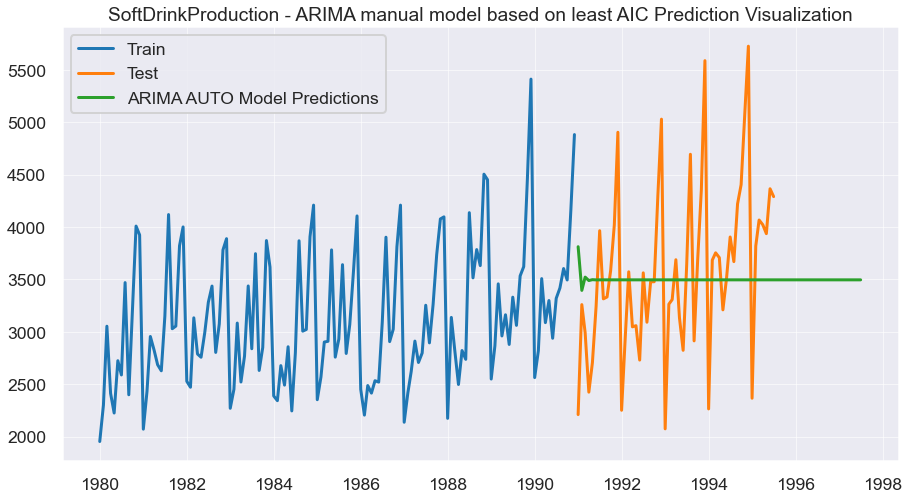

In [84]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('SoftDrinkProduction - ARIMA manual model based on least AIC Prediction Visualization');  
plt.plot(predicted_manual_ARIMA_2yrs,label = 'ARIMA AUTO Model Predictions');
plt.legend(loc='best');

## SARIMA Manual Model

Plot the ACF and PACF plot again

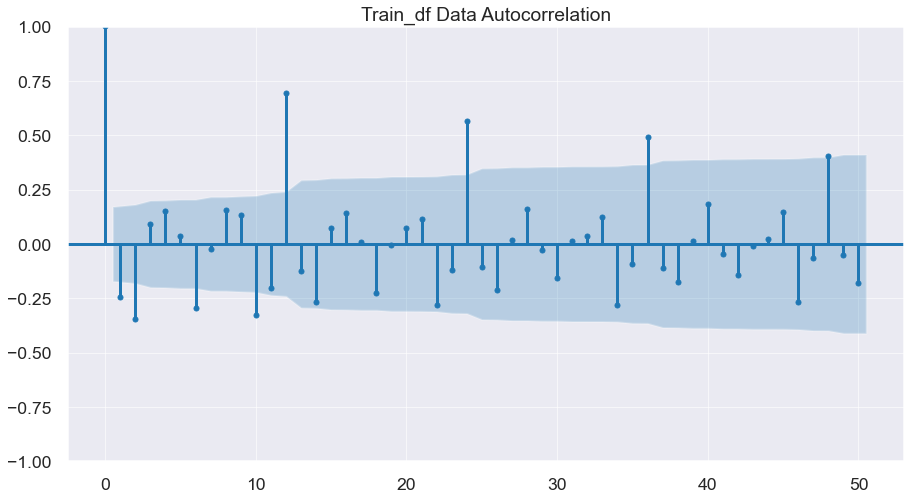

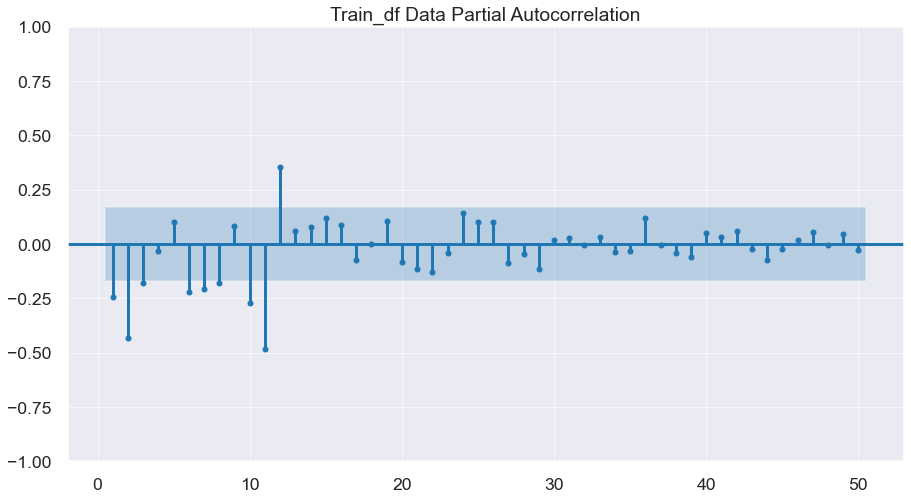

In [85]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})
plot_acf(train_df.diff().dropna(),
         title='Train_df Data Autocorrelation',
         lags=50);
plot_pacf(train_df.diff().dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

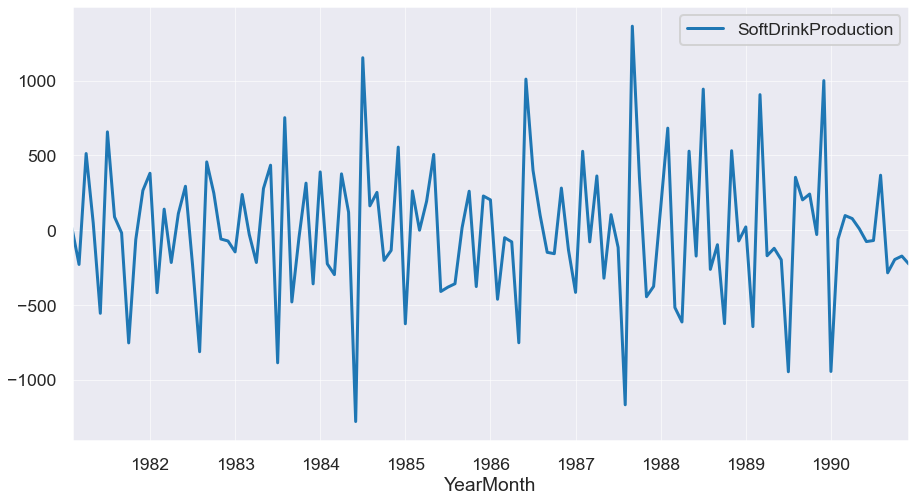

In [86]:
train_df.diff(12).dropna().diff().dropna().plot(); # diff 12 and diff 1 again 

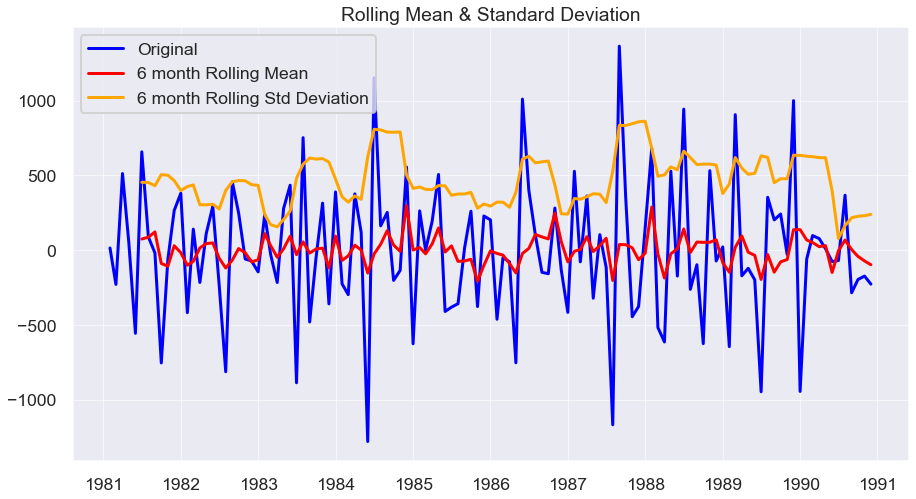

Results of Dickey-Fuller Test:
Test Statistic                  -5.145534
p-value                          0.000011
#Lags Used                      13.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64 



In [87]:
test_stationarity(train_df.diff(12).dropna().diff().dropna())

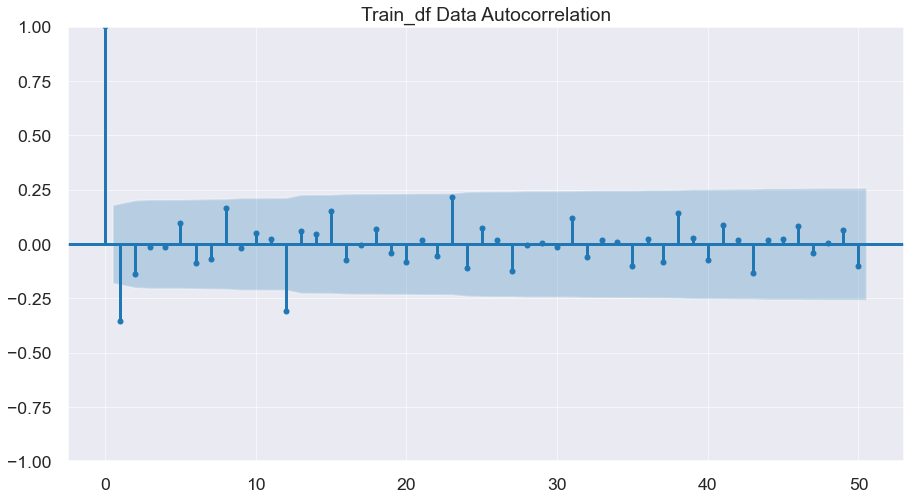

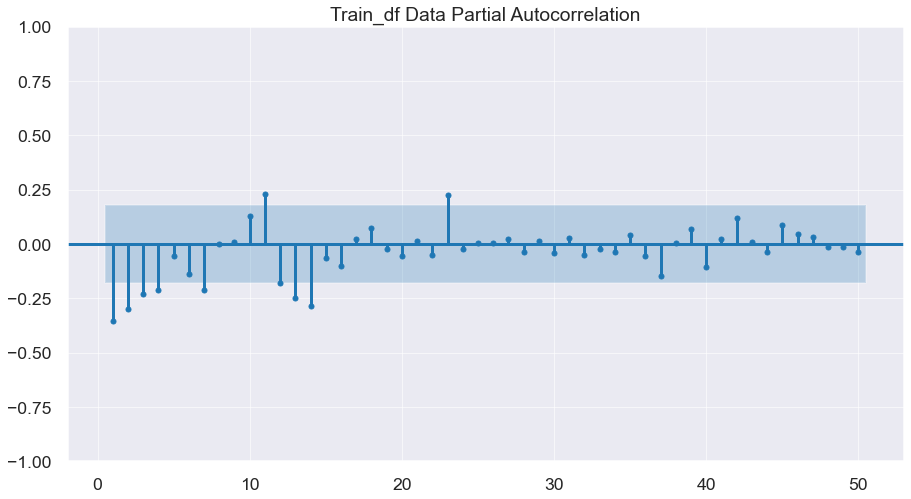

In [88]:
plot_acf(train_df.diff(12).dropna().diff().dropna(),
         title='Train_df Data Autocorrelation',
         lags=50);
plot_pacf(train_df.diff(12).dropna().diff().dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

In [89]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train_df['SoftDrinkProduction'],
                                order=(4, 0, 2),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(4, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -674.520
Date:                            Wed, 25 Jan 2023   AIC                           1369.039
Time:                                    09:07:14   BIC                           1394.365
Sample:                                01-01-1980   HQIC                          1379.265
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0238      0.166     12.208      0.000       1.699       2.349
ar.L2         -1.2603      0.314   

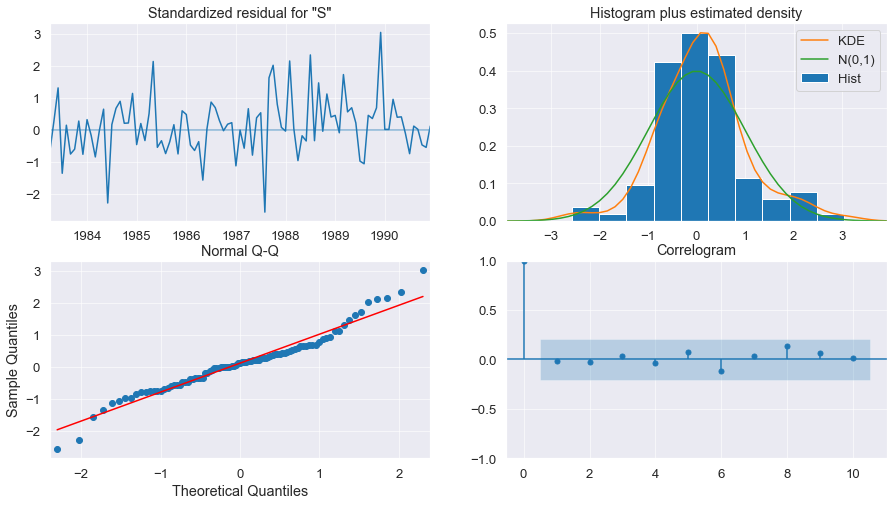

In [90]:
sns.set_context("notebook", font_scale = 1.2, rc={"grid.linewidth": 0.6})
results_manual_SARIMA.plot_diagnostics();

In [91]:
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 0.6})

In [92]:
predicted_manual_SARIMA_2yrs = results_manual_SARIMA.get_forecast(steps=len(test_df)+24)
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test_df))
SARIMA_manual_2Yrs=predicted_manual_SARIMA_2yrs.summary_frame(alpha=0.05)
display(predicted_manual_SARIMA.summary_frame(alpha=0.05).head())
SARIMA_manual_2Yrs['mean']

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01           2439.106555  367.388027    1719.039253    3159.173856
1991-02-01           2718.080180  372.423030    1988.144455    3448.015905
1991-03-01           3153.620288  372.961160    2422.629846    3884.610730
1991-04-01           2776.324024  373.692151    2043.900866    3508.747182
1991-05-01           2968.515072  375.004887    2233.519000    3703.511144

1991-01-01    2439.106555
1991-02-01    2718.080180
1991-03-01    3153.620288
1991-04-01    2776.324024
1991-05-01    2968.515072
                 ...     
1997-03-01    3249.827199
1997-04-01    2896.820647
1997-05-01    3094.939310
1997-06-01    2827.527239
1997-07-01    3363.344104
Freq: MS, Name: mean, Length: 79, dtype: float64

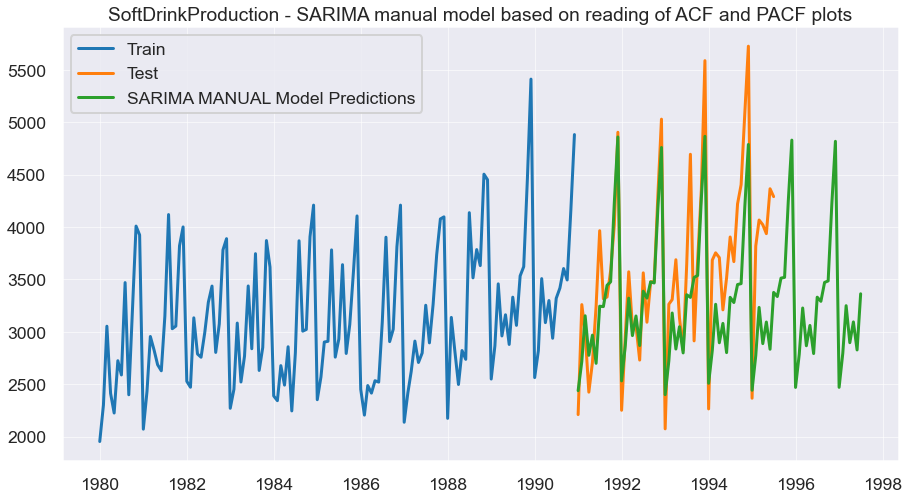

In [93]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('SoftDrinkProduction - SARIMA manual model based on reading of ACF and PACF plots');  
plt.plot(SARIMA_manual_2Yrs['mean'],label = 'SARIMA MANUAL Model Predictions');
plt.legend(loc='best');

In [94]:
a=np.asarray(df_test['SoftDrinkProduction'])
a.shape

(55,)

In [95]:
b=np.asarray(predicted_manual_SARIMA.predicted_mean)
RMSE= mean_squared_error(a,b,squared=False)
MAPE= mean_absolute_percentage_error(a,b)
RMSE_SARIMA_MANUAL = pd.DataFrame({'SoftDrink_TEST RMSE': RMSE,
                               'SoftDrink_MAPE':MAPE},
                                index=['SARIMA_MANUAL(4,0,2)(1,1,2,12)'])
RMSE_SARIMA_MANUAL


SoftDrink_TEST RMSE  SoftDrink_MAPE
SARIMA_MANUAL(4,0,2)(1,1,2,12)           582.573687       11.810305

In [96]:
Results=pd.concat([Result,RMSE_SARIMA_MANUAL])
Results.round(2).sort_values(by='SoftDrink_TEST RMSE')

SoftDrink_TEST RMSE  \
SARIMA_AUTO(3,1,1)(3,0,2,12)                                     427.63   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...               447.54   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...               448.20   
SARIMA_MANUAL(4,0,2)(1,1,2,12)                                   582.57   
Linear Regression Model                                          775.81   
SES Model, Alpha=0.0987                                          809.50   
ARIMA_AUTO(2,1,3)                                                816.46   
ARIMA_MANUAL(2,1,2)                                              823.03   
SIMPLE AVG Model                                                 934.35   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                          1064.78   
Naive Regression Model                                          1519.26   

                                                    SoftDrink_MAPE  
SARIMA_AUTO(3,1,1)(3,0,2,12)                                 10.88  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...           10.92  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...           11.12  
SARIMA_MANUAL(4,0,2)(1,1,2,12)                               11.81  
Linear Regression Model                                      17.42  
SES Model, Alpha=0.0987                                      19.00  
ARIMA_AUTO(2,1,3)                                            19.95  
ARIMA_MANUAL(2,1,2)                                          18.38  
SIMPLE AVG Model                                             19.13  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                       29.96  
Naive Regression Model                                       44.28

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [97]:
Results.round(1).sort_values(by='SoftDrink_TEST RMSE')

SoftDrink_TEST RMSE  \
SARIMA_AUTO(3,1,1)(3,0,2,12)                                      427.6   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...                447.5   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...                448.2   
SARIMA_MANUAL(4,0,2)(1,1,2,12)                                    582.6   
Linear Regression Model                                           775.8   
SES Model, Alpha=0.0987                                           809.5   
ARIMA_AUTO(2,1,3)                                                 816.5   
ARIMA_MANUAL(2,1,2)                                               823.0   
SIMPLE AVG Model                                                  934.4   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                           1064.8   
Naive Regression Model                                           1519.3   

                                                    SoftDrink_MAPE  
SARIMA_AUTO(3,1,1)(3,0,2,12)                                  10.9  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...            10.9  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...            11.1  
SARIMA_MANUAL(4,0,2)(1,1,2,12)                                11.8  
Linear Regression Model                                       17.4  
SES Model, Alpha=0.0987                                       19.0  
ARIMA_AUTO(2,1,3)                                             20.0  
ARIMA_MANUAL(2,1,2)                                           18.4  
SIMPLE AVG Model                                              19.1  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                        30.0  
Naive Regression Model                                        44.3

# QUESTION9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## We select the Triple Exponential Smoothening with ADDITIVE seasonality and ADDITIVE trend , which has the least RMSE

we shall check the RMSE for the Train and Test data for the selected model to ascertain if the model is a right fit and not over fit or underfit.

In [98]:
atrain=np.asarray(df_train['SoftDrinkProduction'])
atrain.shape

(132,)

In [99]:
model_TES_ADD_df_FULLDATA=ExponentialSmoothing(df,initialization_method='estimated',seasonal='add',trend='add')
                                                
model_TES_ADD_df_FULLDATA=model_TES_ADD_df_FULLDATA.fit(smoothing_level=0.08830330642635406,
                                                            smoothing_trend=6.730635331927582e-05,
                                                            smoothing_seasonal=0.004455138229351625)   

In [100]:
TES_ADD_df_predict_atrain=model_TES_ADD_df_FULLDATA.predict(start=0,end=131)
TES_ADD_df_predict_atrain
btrain=np.asarray(TES_ADD_df_predict_atrain)
btrain.shape

(132,)

In [101]:
RMSEtrain=mean_squared_error(atrain,btrain,squared=False)
RMSEtrain

306.0890752765564

In [102]:
display(df_train.shape)
display(df_test.shape)
display(df.shape)

(132, 1)

(55, 1)

(187, 1)

In [103]:
atest=np.asarray(df_test['SoftDrinkProduction'])

In [104]:
TES_ADD_df_predict_atest=model_TES_ADD_df_FULLDATA.predict(start=132,end=186)
TES_ADD_df_predict_atest
btest=np.asarray(TES_ADD_df_predict_atest)
display(btest)
display(atest)

array([2534.90949229, 3015.89933051, 3379.4294812 , 3113.6773261 ,
       3116.48223101, 3057.78836525, 3493.3693304 , 3804.60946281,
       3348.6449047 , 3559.47383306, 4285.65755601, 4672.77890019,
       2488.00890754, 2979.28328848, 3316.02623799, 3105.82920281,
       3165.58196863, 3136.28892934, 3520.90633795, 3789.92823957,
       3317.67254906, 3544.20850342, 4261.17749925, 4678.00766083,
       2501.72789274, 2977.08552704, 3342.83591847, 3105.46323487,
       3221.54364053, 3192.77610728, 3582.60962   , 3850.03745035,
       3517.76749105, 3675.82557395, 4400.04694505, 4810.38817252,
       2668.23310412, 3148.85086371, 3535.18362119, 3322.96882597,
       3418.64034172, 3377.74828871, 3814.36897389, 4087.87567611,
       3637.73425121, 3903.35640449, 4670.66800092, 5125.06008721,
       2962.06243007, 3429.93946126, 3801.88253136, 3594.50954397,
       3691.298477  , 3692.09193136, 4175.63850852])

array([2211, 3260, 2992, 2425, 2707, 3244, 3965, 3315, 3333, 3583, 4021,
       4904, 2252, 2952, 3573, 3048, 3059, 2731, 3563, 3092, 3478, 3478,
       4308, 5029, 2075, 3264, 3308, 3688, 3136, 2824, 3644, 4694, 2914,
       3686, 4358, 5587, 2265, 3685, 3754, 3708, 3210, 3517, 3905, 3670,
       4221, 4404, 5086, 5725, 2367, 3819, 4067, 4022, 3937, 4365, 4290],
      dtype=int64)

In [105]:
atest=np.asarray(df_test['SoftDrinkProduction'])

In [106]:
RMSEtest=mean_squared_error(atest,btest,squared=False)
RMSEtest

387.4700424676001

In [107]:
Mapetrain=mean_absolute_percentage_error(atrain,btrain)
Mapetest=mean_absolute_percentage_error(atest,btest)
display(Mapetrain)
display(Mapetest)

7.7209779830530785

9.299397193025698

In [108]:
Fitment_test_RMSE=pd.DataFrame({'TRAIN RMSE':RMSEtrain,
                               'TEST RMSE': RMSEtest},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Fitment_test_RMSE.round(2)

TRAIN RMSE  TEST RMSE
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...      306.09     387.47

In [109]:
Fitment_test_MAPE=pd.DataFrame({'TRAIN MAPE':Mapetrain,
                               'TEST MAPE': Mapetest},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Fitment_test_MAPE.round(2)

TRAIN MAPE  TEST MAPE
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...        7.72        9.3

In [110]:
Fitment_test=pd.concat([Fitment_test_RMSE,Fitment_test_MAPE],axis=1,join='inner')
Fitment_test.round(2)

TRAIN RMSE  TEST RMSE  \
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...      306.09     387.47   

                                                    TRAIN MAPE  TEST MAPE  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...        7.72        9.3

TES_ADD model is fitted on the full data and predictions are made for future 12 months



TES_ADD Model best parameters for SoftDrinkProduction


{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 2849.8967692039823,
 'initial_trend': 6.704074578738578,
 'initial_seasons': array([-969.35826891, -451.87969678, -121.28879617, -358.16551003,
        -306.47587791, -332.1584798 ,   82.55511184,  339.12538217,
         -76.85379462,  130.26066922,  846.36974421, 1257.77519797]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of SoftDrinkProduction using the TES-Additive Model


1995-08-01    4448.99
1995-09-01    4040.23
1995-10-01    4254.00
1995-11-01    4976.74
1995-12-01    5395.29
1996-01-01    3174.00
1996-02-01    3698.82
1996-03-01    4035.87
1996-04-01    3805.82
1996-05-01    3864.05
1996-06-01    3845.06
1996-07-01    4266.19
Freq: MS, dtype: float64

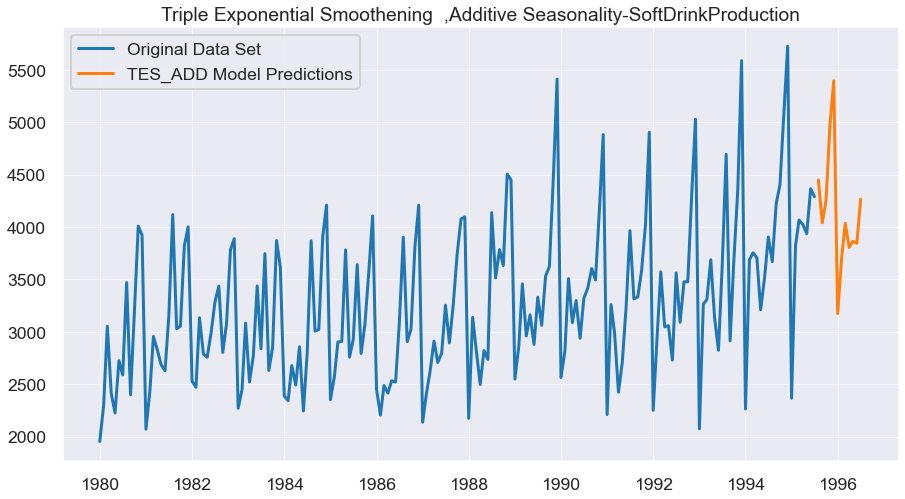

In [111]:
model_TES_ADD_df_FULLDATA=ExponentialSmoothing(df,initialization_method='estimated',seasonal='add',trend='add')
                                                
model_TES_ADD_df_FULLDATA=model_TES_ADD_df_FULLDATA.fit(smoothing_level=0.08830330642635406,
                                                            smoothing_trend=6.730635331927582e-05,
                                                            smoothing_seasonal=0.004455138229351625)   
               
print('\n')
print('TES_ADD Model best parameters for SoftDrinkProduction')
display(model_TES_ADD_df_FULLDATA.params)
TES_ADD_df_predict_1yrahead=model_TES_ADD_df_FULLDATA.forecast(steps=12)

print('Predictions for test data of SoftDrinkProduction using the TES-Additive Model')
display(TES_ADD_df_predict_1yrahead.round(2))
print('\n')
plt.plot(df,label='Original Data Set');

plt.plot(TES_ADD_df_predict_1yrahead,label='TES_ADD Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening  ,Additive Seasonality-SoftDrinkProduction');

In [112]:
predictions =pd.DataFrame(TES_ADD_df_predict_1yrahead.round(2),
                         columns=['Predicted Sales'])
predictions

Predicted Sales
1995-08-01          4448.99
1995-09-01          4040.23
1995-10-01          4254.00
1995-11-01          4976.74
1995-12-01          5395.29
1996-01-01          3174.00
1996-02-01          3698.82
1996-03-01          4035.87
1996-04-01          3805.82
1996-05-01          3864.05
1996-06-01          3845.06
1996-07-01          4266.19

In [113]:
a=np.asarray(df['SoftDrinkProduction'])
a


array([1954, 2302, 3054, 2414, 2226, 2725, 2589, 3470, 2400, 3180, 4009,
       3924, 2072, 2434, 2956, 2828, 2687, 2629, 3150, 4119, 3030, 3055,
       3821, 4001, 2529, 2472, 3134, 2789, 2758, 2993, 3282, 3437, 2804,
       3076, 3782, 3889, 2271, 2452, 3084, 2522, 2769, 3438, 2839, 3746,
       2632, 2851, 3871, 3618, 2389, 2344, 2678, 2492, 2858, 2246, 2800,
       3869, 3007, 3023, 3907, 4209, 2353, 2570, 2903, 2910, 3782, 2759,
       2931, 3641, 2794, 3070, 3576, 4106, 2452, 2206, 2488, 2416, 2534,
       2521, 3093, 3903, 2907, 3025, 3812, 4209, 2138, 2419, 2622, 2912,
       2708, 2798, 3254, 2895, 3263, 3736, 4077, 4097, 2175, 3138, 2823,
       2498, 2822, 2738, 4137, 3515, 3785, 3632, 4504, 4451, 2550, 2867,
       3458, 2961, 3163, 2880, 3331, 3062, 3534, 3622, 4464, 5411, 2564,
       2820, 3508, 3088, 3299, 2939, 3320, 3418, 3604, 3495, 4163, 4882,
       2211, 3260, 2992, 2425, 2707, 3244, 3965, 3315, 3333, 3583, 4021,
       4904, 2252, 2952, 3573, 3048, 3059, 2731, 35

In [114]:
TES_ADD_df_predict=model_TES_ADD_df_FULLDATA.predict(start=0,end=(len(df)-1))
TES_ADD_df_predict
b=np.asarray(TES_ADD_df_predict)
b

array([1887.24257487, 2417.32051972, 2744.43202308, 2541.59681098,
       2588.72409027, 2537.71446356, 2975.66981209, 3204.79738617,
       2818.9395799 , 2995.76090658, 3734.84061063, 4177.15858233,
       1934.66962189, 2470.16638703, 2806.15904707, 2587.26947981,
       2665.87364361, 2651.21181864, 3068.11173171, 3341.52242421,
       2997.8589964 , 3217.20890892, 3926.10409163, 4332.58769081,
       2084.91751825, 2646.73503466, 2971.32596812, 2753.98026078,
       2813.44562396, 2791.8332157 , 3228.92735922, 3502.89769273,
       3081.44105988, 3272.58635409, 3978.69845748, 4376.0825641 ,
       2118.1340823 , 2651.47424919, 2975.37863876, 2752.68566963,
       2788.27823705, 2770.99589343, 3248.56112256, 3481.1424759 ,
       3087.94527325, 3263.68231906, 3950.70469542, 4357.11949268,
       2079.7583337 , 2625.3301595 , 2943.37141098, 2686.13216188,
       2725.88476962, 2725.01974762, 3096.57551819, 3342.12365771,
       2968.83901966, 3188.3896732 , 3898.72338831, 4309.96108

In [115]:
RMSE=mean_squared_error(a,b,squared=False)
MAPE=mean_absolute_percentage_error(a,b)
Full_Data_Final_TES_ADD_model_result=pd.DataFrame({'SoftDrink_TEST RMSE': RMSE,
                               'SoftDrink_MAPE':MAPE},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Full_Data_Final_TES_ADD_model_result.round(2)

SoftDrink_TEST RMSE  \
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...                332.1   

                                                    SoftDrink_MAPE  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...            8.19

In [116]:
model_TES_ADD_df_FULLDATA.resid

YearMonth
1980-01-01     66.757425
1980-02-01   -115.320520
1980-03-01    309.567977
1980-04-01   -127.596811
1980-05-01   -362.724090
                 ...    
1995-03-01    265.117469
1995-04-01    427.490456
1995-05-01    245.701523
1995-06-01    672.908069
1995-07-01    114.361491
Length: 187, dtype: float64

In [117]:
stddev=np.std(model_TES_ADD_df_FULLDATA.resid,ddof=1)
stddev

332.9927925693946

In [118]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_ci':TES_ADD_df_predict_1yrahead - 1.96*stddev,
                          'prediction':TES_ADD_df_predict_1yrahead,
                          'upper_ci': TES_ADD_df_predict_1yrahead + 1.96*stddev})
pred_1_df.round(2)

lower_ci  prediction  upper_ci
1995-08-01   3796.33     4448.99   5101.66
1995-09-01   3387.57     4040.23   4692.90
1995-10-01   3601.34     4254.00   4906.67
1995-11-01   4324.07     4976.74   5629.41
1995-12-01   4742.63     5395.29   6047.96
1996-01-01   2521.34     3174.00   3826.67
1996-02-01   3046.16     3698.82   4351.49
1996-03-01   3383.20     4035.87   4688.53
1996-04-01   3153.15     3805.82   4458.48
1996-05-01   3211.39     3864.05   4516.72
1996-06-01   3192.39     3845.06   4497.72
1996-07-01   3613.52     4266.19   4918.85

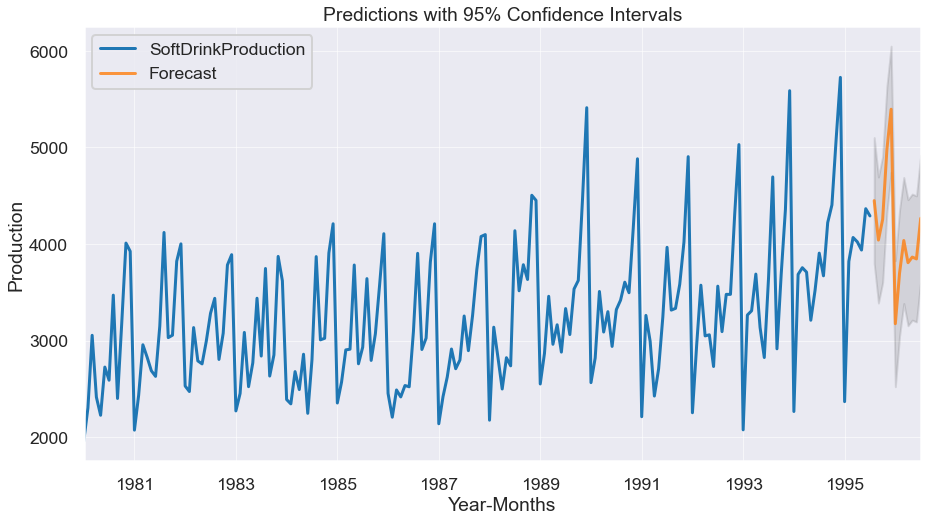

In [119]:
axis = df.plot(label='Actual', figsize=(15,8));
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.8);
axis.fill_between(pred_1_df.index, pred_1_df['lower_ci'], pred_1_df['upper_ci'], color='k', alpha=.1);
axis.set_xlabel('Year-Months')
axis.set_ylabel('Production')
plt.legend(loc='best');
plt.title('Predictions with 95% Confidence Intervals');

In [120]:
ninetys=df['1990-01-01':'1995-07-01']
ninetys

SoftDrinkProduction
YearMonth                      
1990-01-01                 2564
1990-02-01                 2820
1990-03-01                 3508
1990-04-01                 3088
1990-05-01                 3299
...                         ...
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290

[67 rows x 1 columns]

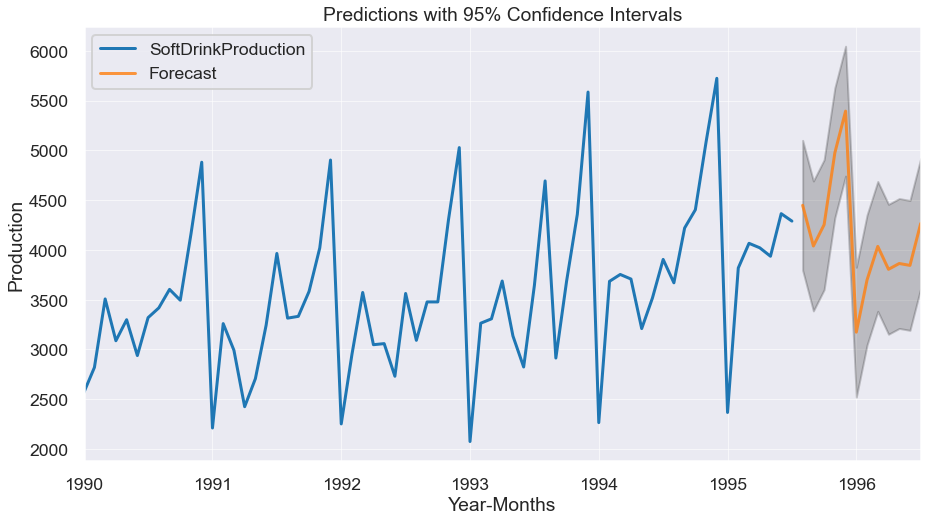

In [121]:
axis = ninetys.plot(label='Actual', figsize=(15,8));
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.8);
axis.fill_between(pred_1_df.index, pred_1_df['lower_ci'], pred_1_df['upper_ci'], color='k', alpha=.2);
axis.set_xlabel('Year-Months')
axis.set_ylabel('Production')
plt.legend(loc='best');
plt.title('Predictions with 95% Confidence Intervals');

# 10. Comment on the model thus built and report your findings and suggest the measures that the company               should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
